# Customer Churn

## Problem Statement: 

###  An E Commerce company is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation owing to the growing industry. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. Thus, by losing one account the company might be losing more than one customer.

### Import the required Libraries

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import scipy.stats as stats
from scipy.stats import shapiro

import warnings
warnings.filterwarnings("ignore")

### Load the required Dataset

In [142]:
missing_value_formats = ['#', '+', 'NaN', '@', '$', 'nan', '*', '&&&&']

churn = pd.read_excel("Customer_Churn_Data.xlsx", sheet_name = 1, na_values = missing_value_formats)
churn.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.00,3.00,6.00,Debit Card,Female,3.00,3.00,Super,2.00,Single,9.00,1.00,11.00,1.00,5.00,159.93,Mobile
1,20001,1,0.00,1.00,8.00,UPI,Male,3.00,4.00,Regular Plus,3.00,Single,7.00,1.00,15.00,0.00,0.00,120.90,Mobile
2,20002,1,0.00,1.00,30.00,Debit Card,Male,2.00,4.00,Regular Plus,3.00,Single,6.00,1.00,14.00,0.00,3.00,NaN,Mobile
3,20003,1,0.00,3.00,15.00,Debit Card,Male,2.00,4.00,Super,5.00,Single,8.00,0.00,23.00,0.00,3.00,134.07,Mobile
4,20004,1,0.00,1.00,12.00,Credit Card,Male,2.00,3.00,Regular Plus,5.00,Single,3.00,0.00,11.00,1.00,3.00,129.60,Mobile


### Dataset

In [143]:
churn.shape
print("The number of rows are:", churn.shape[0],"and the number of columns are:", churn.shape[1])

The number of rows are: 11260 and the number of columns are: 19


In [144]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

### Check for Missing Values

In [145]:
churn.replace(['#', '+', '@', '$', 'nan', '*', 'NaN', '&&&&'], np.nan, inplace = True)

In [146]:
churn.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [147]:
churn.isnull().sum().sum()

4361

There are missing values in the dataset.

### Heat Map

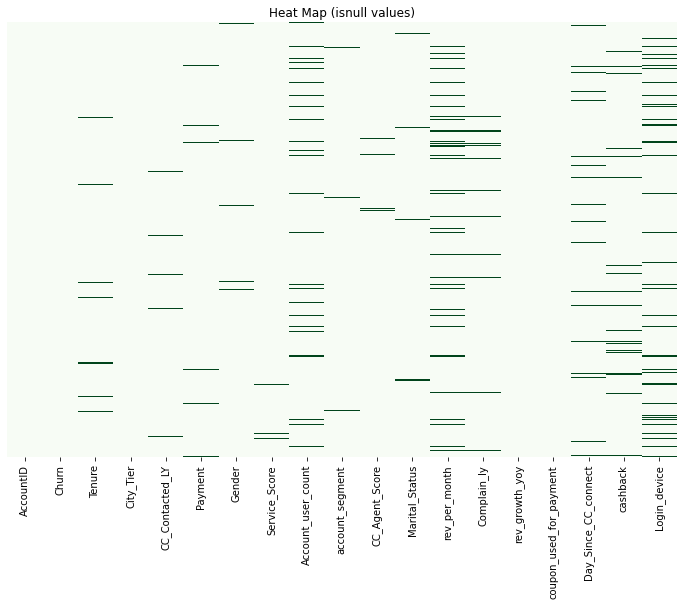

In [148]:
plt.figure(figsize = (12,8))
sns.heatmap(churn.isnull(), cbar = False, cmap = 'Greens', yticklabels = False)
plt.title("Heat Map (isnull values)")
plt.show()

In [149]:
churn.isnull().sum().sort_values(ascending = False)/churn.index.size

rev_per_month             0.07
Login_device              0.07
cashback                  0.04
Account_user_count        0.04
Day_Since_CC_connect      0.03
Complain_ly               0.03
Tenure                    0.02
Marital_Status            0.02
CC_Agent_Score            0.01
City_Tier                 0.01
Payment                   0.01
Gender                    0.01
CC_Contacted_LY           0.01
Service_Score             0.01
account_segment           0.01
coupon_used_for_payment   0.00
rev_growth_yoy            0.00
Churn                     0.00
AccountID                 0.00
dtype: float64

### Check for Duplicate Rows

In [150]:
dups = churn.duplicated()
dups.sum()

0

We can conclude, that by observing the results above there is no evidence of duplicated rows present in our dataset.

### Descriptive Statistics

In [151]:
pd.options.display.float_format = '{:.2f}'.format
churn.describe()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
count,11260.00,11260.00,11042.00,11148.00,11158.00,11162.00,10816.00,11144.00,10469.00,10903.00,11257.00,11257.00,10902.00,10787.00
mean,25629.50,0.17,11.03,1.65,17.87,2.90,3.69,3.07,6.36,0.29,16.19,1.79,4.63,196.24
std,3250.63,0.37,12.88,0.92,8.85,0.73,1.02,1.38,11.91,0.45,3.76,1.97,3.70,178.66
min,20000.00,0.00,0.00,1.00,4.00,0.00,1.00,1.00,1.00,0.00,4.00,0.00,0.00,0.00
25%,22814.75,0.00,2.00,1.00,11.00,2.00,3.00,2.00,3.00,0.00,13.00,1.00,2.00,147.21
50%,25629.50,0.00,9.00,1.00,16.00,3.00,4.00,3.00,5.00,0.00,15.00,1.00,3.00,165.25
75%,28444.25,0.00,16.00,3.00,23.00,3.00,4.00,4.00,7.00,1.00,19.00,2.00,8.00,200.01
max,31259.00,1.00,99.00,3.00,132.00,5.00,6.00,5.00,140.00,1.00,28.00,16.00,47.00,1997.00


### Proportion of 0's and 1's

In [152]:
churn['Churn'].value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [153]:
churn['Churn'].value_counts(normalize = True)

0   0.83
1   0.17
Name: Churn, dtype: float64

The data is somewhat imbalanced.

#### Now, let us check the basic measures of descriptive statistics for the categorical variables

In [154]:
churn["City_Tier"].value_counts()

1.00    7263
3.00    3405
2.00     480
Name: City_Tier, dtype: int64

In [155]:
churn["City_Tier"] = churn["City_Tier"].replace({1.00: 'Tier 1', 2.00: 'Tier 2', 3.00: 'Tier 3'})

In [156]:
churn["City_Tier"].value_counts()

Tier 1    7263
Tier 3    3405
Tier 2     480
Name: City_Tier, dtype: int64

In [157]:
churn["Payment"].value_counts()

Debit Card          4587
Credit Card         3511
E wallet            1217
Cash on Delivery    1014
UPI                  822
Name: Payment, dtype: int64

In [158]:
churn["Gender"].value_counts()

Male      6328
Female    4178
M          376
F          270
Name: Gender, dtype: int64

In [159]:
churn["Gender"] = churn["Gender"].replace({'M': 'Male', 'F': 'Female'})

In [160]:
churn["Gender"].value_counts()

Male      6704
Female    4448
Name: Gender, dtype: int64

In [161]:
churn["Service_Score"].value_counts()

3.00    5490
2.00    3251
4.00    2331
1.00      77
0.00       8
5.00       5
Name: Service_Score, dtype: int64

In [162]:
churn["Service_Score"] = churn["Service_Score"].replace({0.00: 'NaN'})

In [163]:
churn["Service_Score"].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
NaN       8
5.0       5
Name: Service_Score, dtype: int64

In [164]:
churn["account_segment"].value_counts()

Super           4062
Regular Plus    3862
HNI             1639
Super Plus       771
Regular          520
Regular +        262
Super +           47
Name: account_segment, dtype: int64

In [165]:
churn["account_segment"] = churn["account_segment"].replace({'Super +': 'Super Plus', 'Regular +': 'Regular Plus'})

In [166]:
churn["account_segment"].value_counts()

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

In [167]:
churn["Marital_Status"].value_counts()

Married     5860
Single      3520
Divorced    1668
Name: Marital_Status, dtype: int64

In [168]:
churn["Complain_ly"].value_counts()

0.00    7792
1.00    3111
Name: Complain_ly, dtype: int64

In [169]:
churn["Login_device"].value_counts()

Mobile      7482
Computer    3018
Name: Login_device, dtype: int64

### Univariate Analysis

skew value of churn is 1.77260635008676
skew value of tenure is 3.8957074954569526
skew value of customer care contacted in last 12 months is 1.4229770400956239
skew value of account user count is -0.393099821770616
skew value of revenue per month is 9.093908709380536


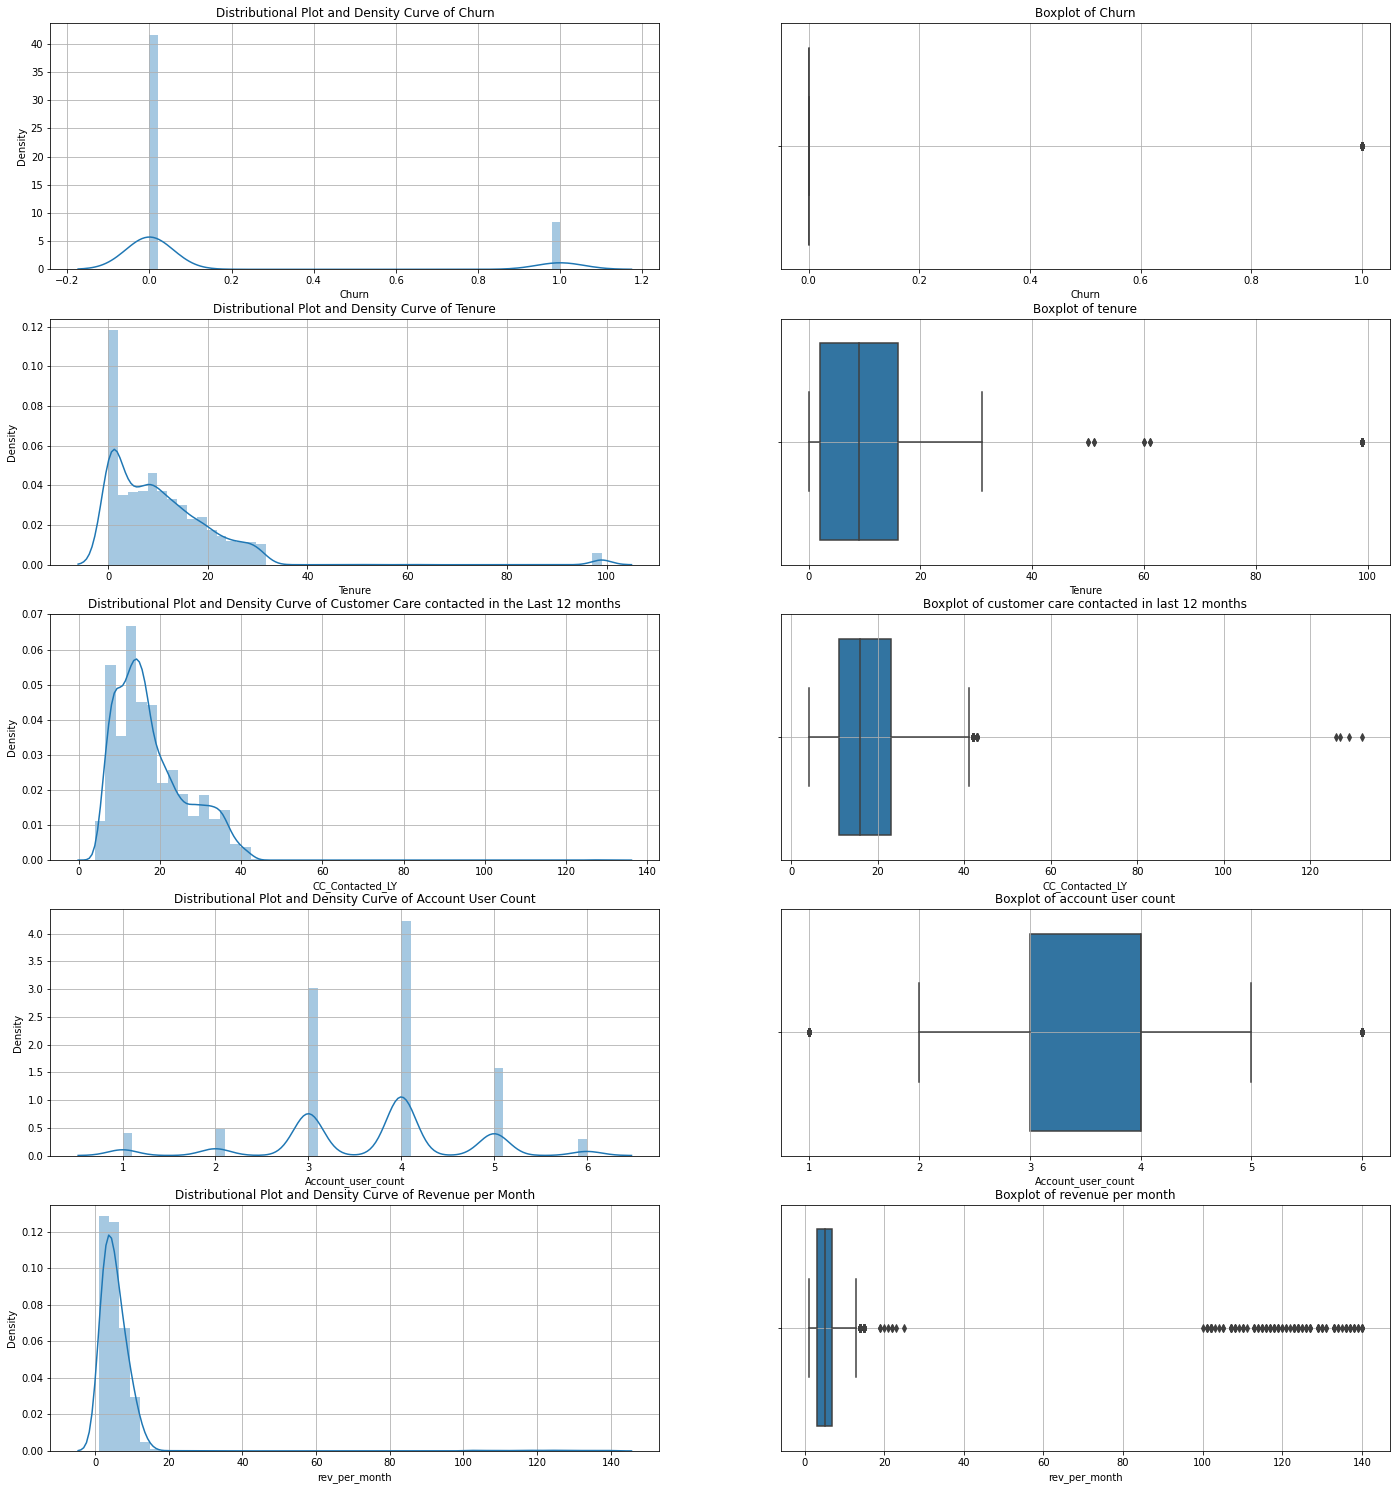

In [170]:
plt.figure(figsize=[24, 48])

plt.subplot(9, 2, 1)
sns.distplot(churn['Churn'], kde=True);
plt.title("Distributional Plot and Density Curve of Churn")
plt.grid("True")
print('skew value of churn is', churn['Churn'].skew())

plt.subplot(9, 2, 2)
sns.boxplot(churn['Churn'], orient = "h");
plt.title("Boxplot of Churn")
plt.grid("True")

plt.subplot(9, 2, 3)
sns.distplot(churn['Tenure'], kde=True);
plt.title("Distributional Plot and Density Curve of Tenure")
plt.grid("True")
print('skew value of tenure is', churn['Tenure'].skew())

plt.subplot(9, 2, 4)
sns.boxplot(churn['Tenure'], orient = "h");
plt.title("Boxplot of tenure")
plt.grid("True")

plt.subplot(9, 2, 5)
sns.distplot(churn['CC_Contacted_LY'], kde=True);
plt.title("Distributional Plot and Density Curve of Customer Care contacted in the Last 12 months")
plt.grid("True")
print('skew value of customer care contacted in last 12 months is', churn['CC_Contacted_LY'].skew())

plt.subplot(9, 2, 6)
sns.boxplot(churn['CC_Contacted_LY'], orient = "h");
plt.title("Boxplot of customer care contacted in last 12 months") 
plt.grid("True")

plt.subplot(9, 2, 7)
sns.distplot(churn['Account_user_count'], kde=True);
plt.title("Distributional Plot and Density Curve of Account User Count")
plt.grid("True")
print('skew value of account user count is', churn['Account_user_count'].skew())

plt.subplot(9, 2, 8)
sns.boxplot(churn['Account_user_count'], orient = "h");
plt.title("Boxplot of account user count")
plt.grid("True")

plt.subplot(9, 2, 9)
sns.distplot(churn['rev_per_month'], kde=True);
plt.title("Distributional Plot and Density Curve of Revenue per Month")
plt.grid("True")
print('skew value of revenue per month is', churn['rev_per_month'].skew())

plt.subplot(9, 2, 10)
sns.boxplot(churn['rev_per_month'], orient = "h");
plt.title("Boxplot of revenue per month")
plt.grid("True")

plt.show()

Churn
Statistics=0.452, p=0.000
Sample does not look Gaussian (reject H0)


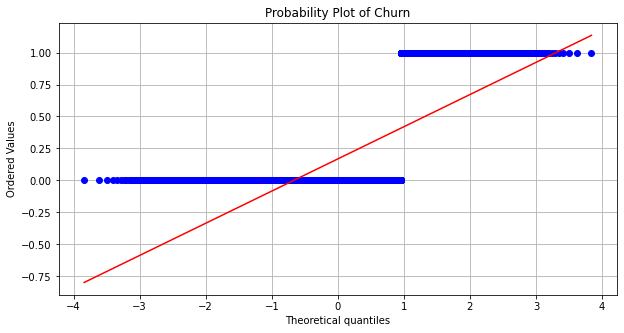

In [171]:
print("Churn")
stat, p = shapiro(churn['Churn'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
plt.figure(figsize=[10,5])

stats.probplot(churn['Churn'], plot=plt);
plt.title("Probability Plot of Churn")
plt.grid("True")

plt.show()

Tenure
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


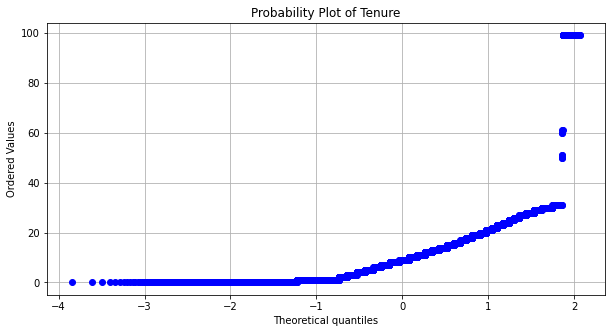

In [172]:
print("Tenure")
stat, p = shapiro(churn['Tenure'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
plt.figure(figsize=[10,5])

stats.probplot(churn['Tenure'], plot=plt);
plt.title("Probability Plot of Tenure")
plt.grid("True")

plt.show()

CC_Contacted_LY
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


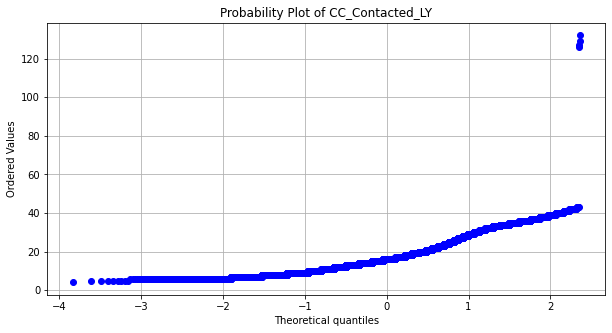

In [173]:
print("CC_Contacted_LY")
stat, p = shapiro(churn['CC_Contacted_LY'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
plt.figure(figsize=[10,5])

stats.probplot(churn['CC_Contacted_LY'], plot=plt);
plt.title("Probability Plot of CC_Contacted_LY")
plt.grid("True")

plt.show()

Account_user_count
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


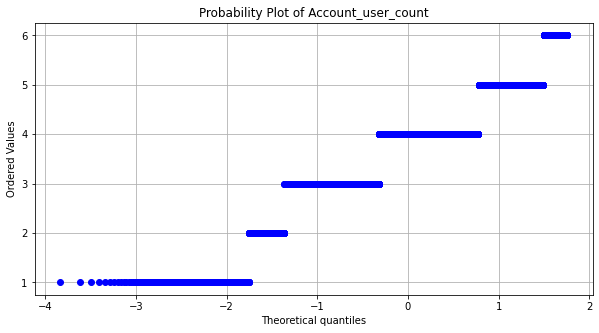

In [174]:
print("Account_user_count")
stat, p = shapiro(churn['Account_user_count'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
plt.figure(figsize=[10,5])

stats.probplot(churn['Account_user_count'], plot=plt);
plt.title("Probability Plot of Account_user_count")
plt.grid("True")

plt.show()

rev_per_month
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


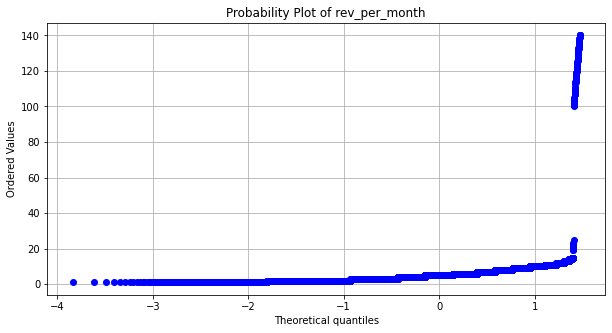

In [175]:
print("rev_per_month")
stat, p = shapiro(churn['rev_per_month'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
plt.figure(figsize=[10,5])

stats.probplot(churn['rev_per_month'], plot=plt);
plt.title("Probability Plot of rev_per_month")
plt.grid("True")

plt.show()

skew value of revenue growth year on year is 0.7524742127976741
skew value of coupon used for payment is 2.5751990170697665
skew value of days since contacted customer care is 1.2730211160156988
skew value of cashback is 8.770766456842171


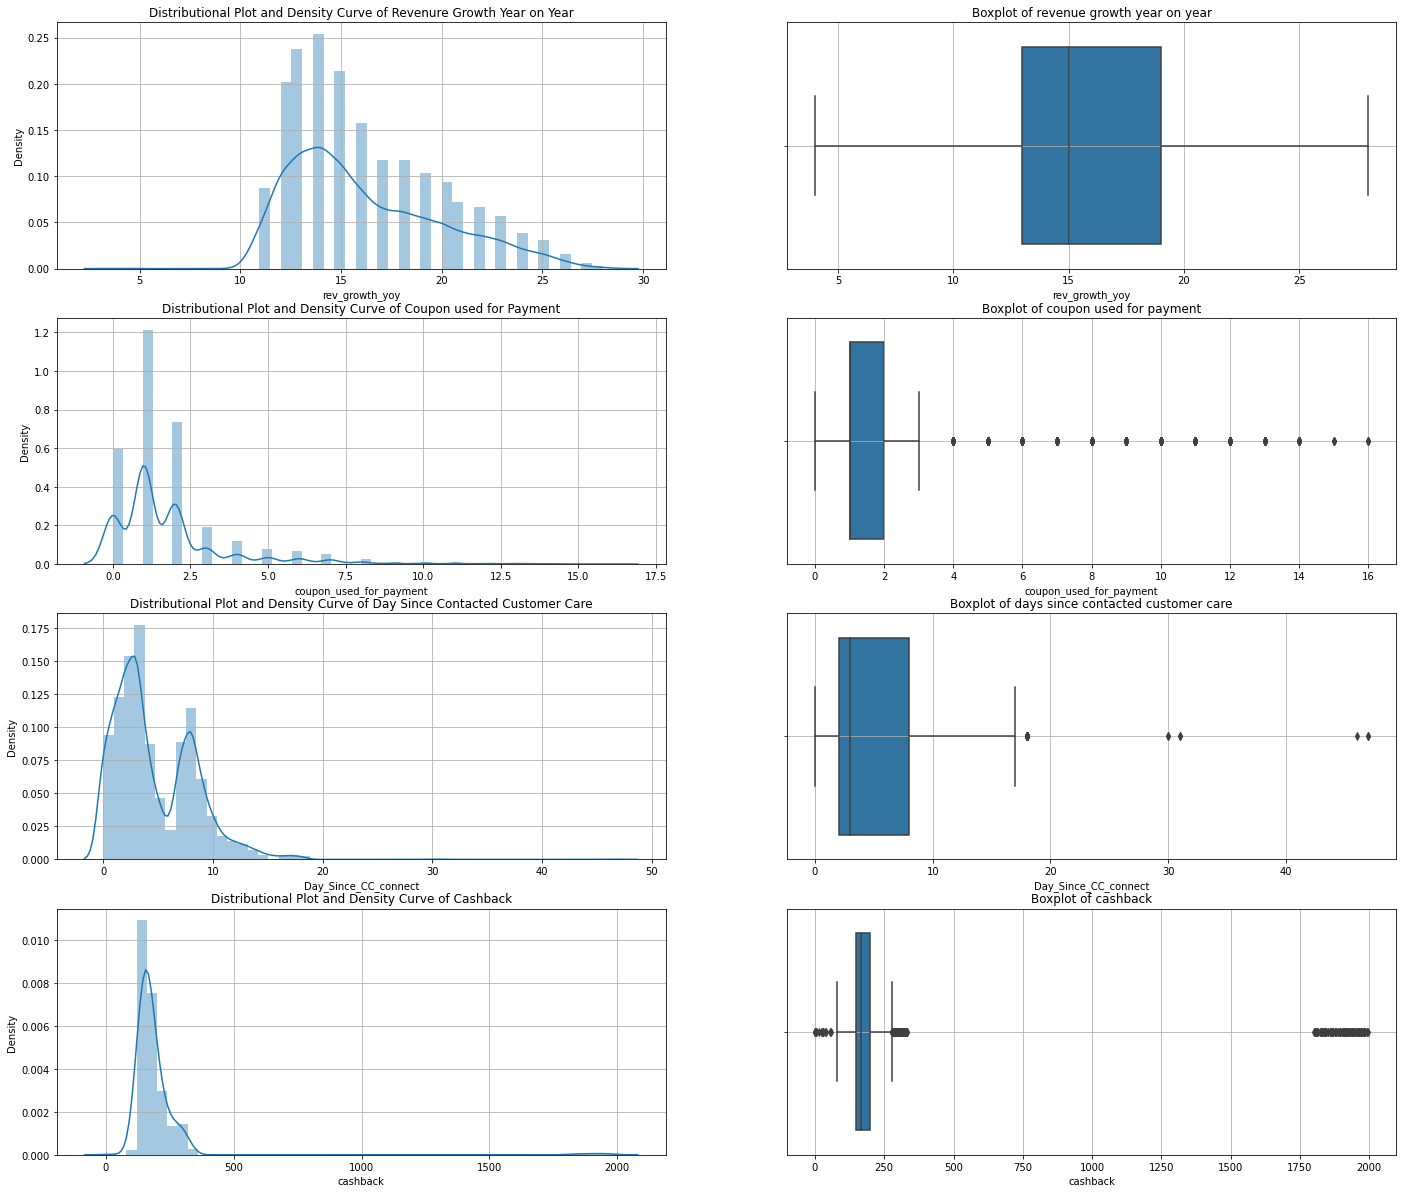

In [176]:
plt.figure(figsize=[24, 48])

plt.subplot(9, 2, 1)
sns.distplot(churn['rev_growth_yoy'], kde=True);
plt.title("Distributional Plot and Density Curve of Revenure Growth Year on Year")
plt.grid("True")
print('skew value of revenue growth year on year is', churn['rev_growth_yoy'].skew())

plt.subplot(9, 2, 2)
sns.boxplot(churn['rev_growth_yoy'], orient = "h");
plt.title("Boxplot of revenue growth year on year")
plt.grid("True")

plt.subplot(9, 2, 3)
sns.distplot(churn['coupon_used_for_payment'], kde=True);
plt.title("Distributional Plot and Density Curve of Coupon used for Payment")
plt.grid("True")
print('skew value of coupon used for payment is', churn['coupon_used_for_payment'].skew())

plt.subplot(9, 2, 4)
sns.boxplot(churn['coupon_used_for_payment'], orient = "h");
plt.title("Boxplot of coupon used for payment")
plt.grid("True")

plt.subplot(9, 2, 5)
sns.distplot(churn['Day_Since_CC_connect'], kde=True);
plt.title("Distributional Plot and Density Curve of Day Since Contacted Customer Care")
plt.grid("True")
print('skew value of days since contacted customer care is', churn['Day_Since_CC_connect'].skew())

plt.subplot(9, 2, 6)
sns.boxplot(churn['Day_Since_CC_connect'], orient = "h");
plt.title("Boxplot of days since contacted customer care")
plt.grid("True")

plt.subplot(9, 2, 7)
sns.distplot(churn['cashback'], kde=True);
plt.title("Distributional Plot and Density Curve of Cashback")
plt.grid("True")
print('skew value of cashback is', churn['cashback'].skew())

plt.subplot(9, 2, 8)
sns.boxplot(churn['cashback'], orient = "h");
plt.title("Boxplot of cashback")
plt.grid("True")


plt.show()

rev_growth_yoy
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


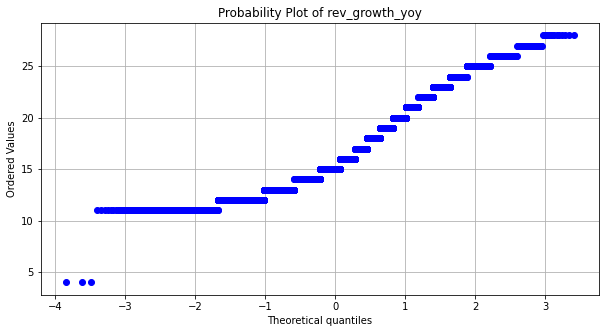

In [177]:
print("rev_growth_yoy")
stat, p = shapiro(churn['rev_growth_yoy'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
plt.figure(figsize=[10,5])

stats.probplot(churn['rev_growth_yoy'], plot=plt);
plt.title("Probability Plot of rev_growth_yoy")
plt.grid("True")

plt.show()

coupon_used_for_payment
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


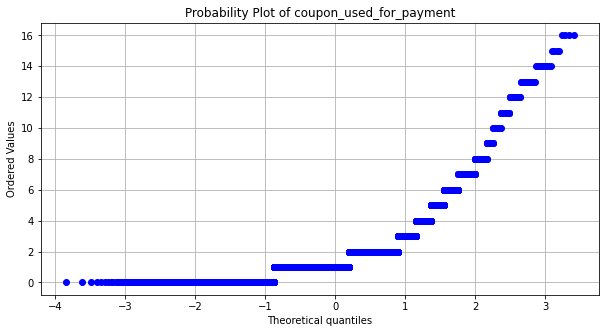

In [178]:
print("coupon_used_for_payment")
stat, p = shapiro(churn['coupon_used_for_payment'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
plt.figure(figsize=[10,5])

stats.probplot(churn['coupon_used_for_payment'], plot=plt);
plt.title("Probability Plot of coupon_used_for_payment")
plt.grid("True")

plt.show()

Day_Since_CC_connect
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


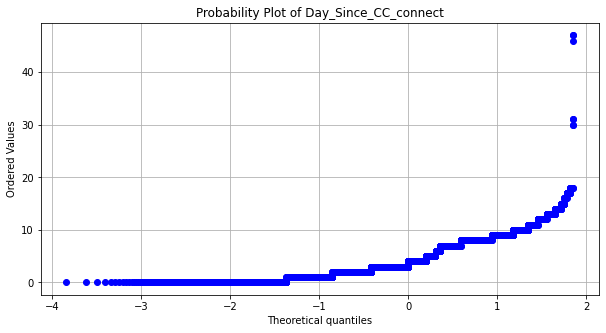

In [179]:
print("Day_Since_CC_connect")
stat, p = shapiro(churn['Day_Since_CC_connect'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
plt.figure(figsize=[10,5])

stats.probplot(churn['Day_Since_CC_connect'], plot=plt);
plt.title("Probability Plot of Day_Since_CC_connect")
plt.grid("True")

plt.show()

cashback
Statistics=nan, p=1.000
Sample looks Gaussian (fail to reject H0)


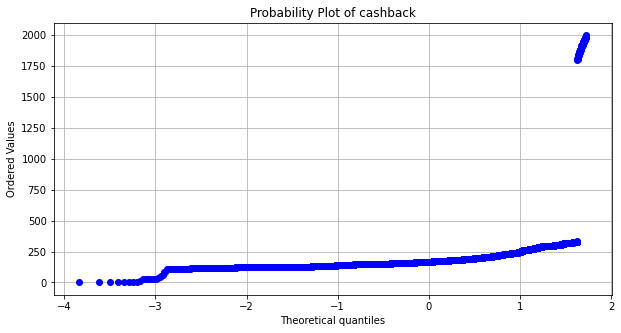

In [180]:
print("cashback")
stat, p = shapiro(churn['Day_Since_CC_connect'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')
    
    
    
plt.figure(figsize=[10,5])

stats.probplot(churn['cashback'], plot=plt);
plt.title("Probability Plot of cashback")
plt.grid("True")

plt.show()

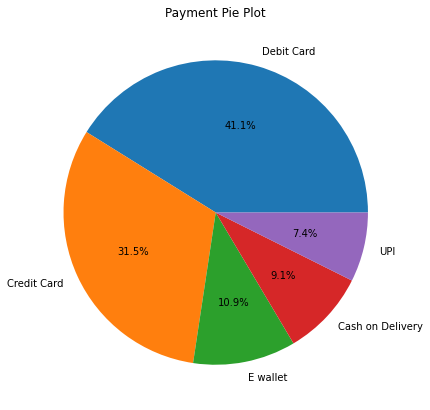

In [181]:
plt.figure(figsize=(10,7))
plt.pie(churn['Payment'].value_counts(),labels=churn['Payment'].value_counts().index,autopct='%1.1f%%')
plt.title("Payment Pie Plot")
plt.show()

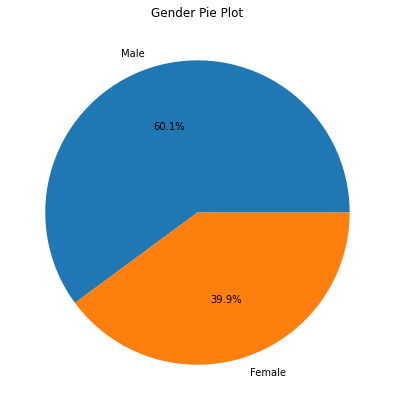

In [182]:
plt.figure(figsize=(10,7))
plt.pie(churn['Gender'].value_counts(),labels=churn['Gender'].value_counts().index,autopct='%1.1f%%')
plt.title("Gender Pie Plot")
plt.show()

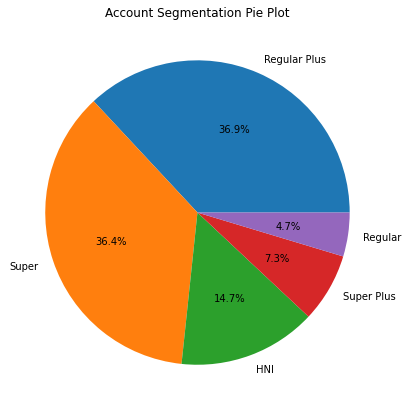

In [183]:
plt.figure(figsize=(10,7))
plt.pie(churn['account_segment'].value_counts(),labels=churn['account_segment'].value_counts().index,autopct='%1.1f%%')
plt.title("Account Segmentation Pie Plot")
plt.show()

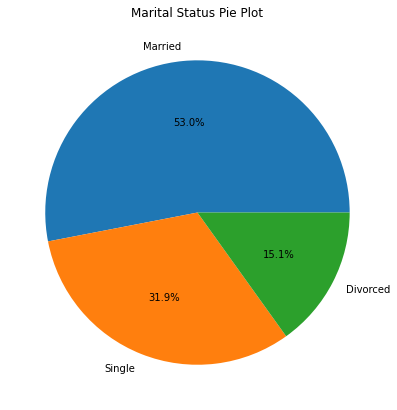

In [184]:
plt.figure(figsize=(10,7))
plt.pie(churn['Marital_Status'].value_counts(),labels=churn['Marital_Status'].value_counts().index,autopct='%1.1f%%')
plt.title("Marital Status Pie Plot")
plt.show()

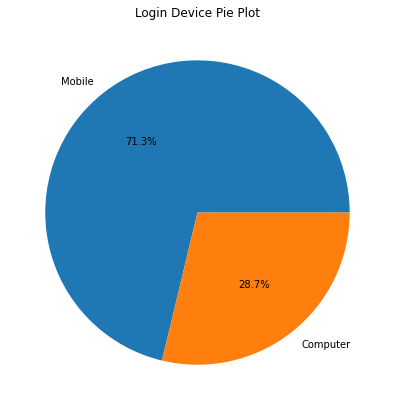

In [185]:
plt.figure(figsize=(10,7))
plt.pie(churn['Login_device'].value_counts(),labels=churn['Login_device'].value_counts().index,autopct='%1.1f%%')
plt.title("Login Device Pie Plot")
plt.show()

### Bivariate Analysis

In [186]:
city_tier_split = churn[[ "AccountID", "City_Tier"]]
sectors = city_tier_split.groupby("City_Tier")
city_tier_split  = pd.DataFrame(sectors["AccountID"].count())
city_tier_split.rename(columns={'AccountID':'No. of Customers'}, inplace=True)
print(city_tier_split)

           No. of Customers
City_Tier                  
Tier 1                 7263
Tier 2                  480
Tier 3                 3405


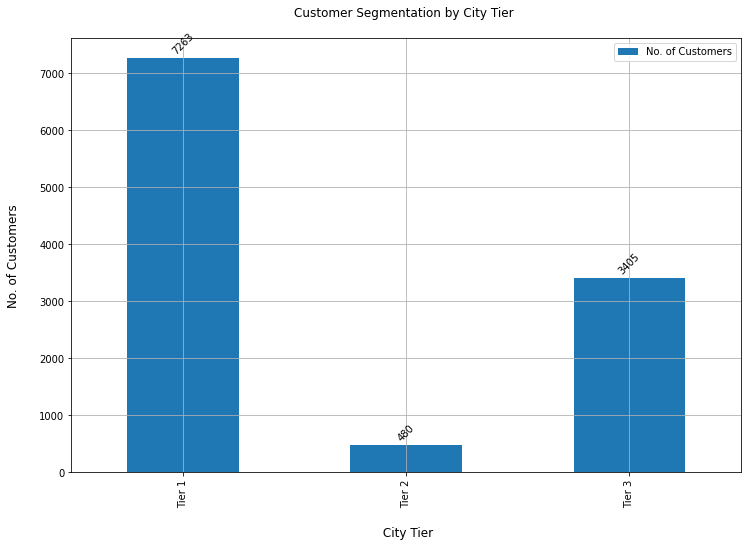

In [187]:
city_tier_split.plot(kind='bar',figsize=(12,8))
plt.title('Customer Segmentation by City Tier \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n City Tier', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

def plot_value_labels(axis, spacing = 5):
    rects = axis.patches
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)

        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)    

plot_value_labels(plt.gca())
plt.grid("True")
plt.show()

In [188]:
payment_method_split = churn[[ "AccountID", "Payment"]]
sectors = payment_method_split.groupby("Payment")
payment_method_split  = pd.DataFrame(sectors["AccountID"].count())
payment_method_split.rename(columns={'AccountID':'No. of Customers'}, inplace=True)
print(payment_method_split)

                  No. of Customers
Payment                           
Cash on Delivery              1014
Credit Card                   3511
Debit Card                    4587
E wallet                      1217
UPI                            822


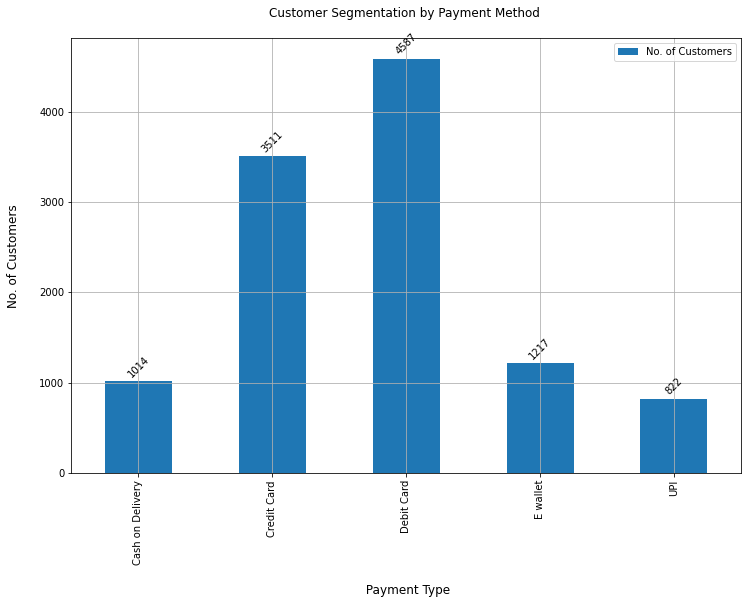

In [189]:
payment_method_split.plot(kind='bar',figsize=(12,8))
plt.title('Customer Segmentation by Payment Method \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Payment Type', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

def plot_value_labels(axis, spacing = 5):
    rects = axis.patches
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)

        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)    

plot_value_labels(plt.gca())
plt.grid("True")
plt.show()

In [190]:
gender_split = churn[[ "AccountID", "Gender"]]
sectors = gender_split.groupby("Gender")
gender_split  = pd.DataFrame(sectors["AccountID"].count())
gender_split.rename(columns={'AccountID':'No. of Customers'}, inplace=True)
print(gender_split)

        No. of Customers
Gender                  
Female              4448
Male                6704


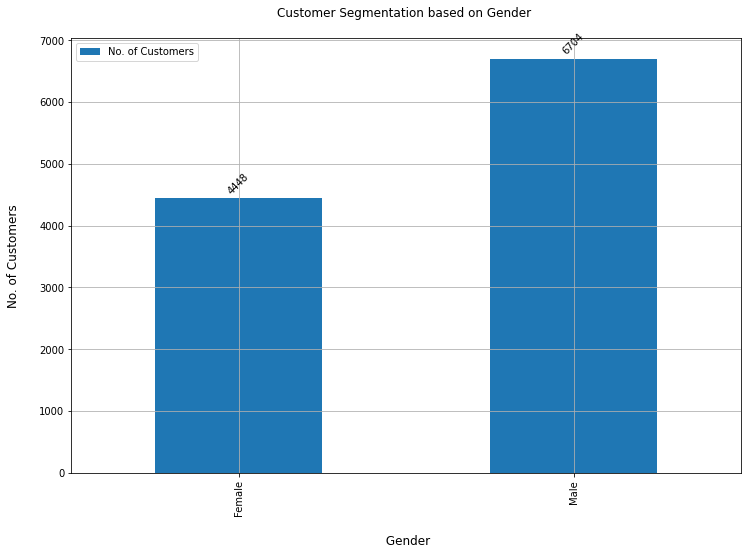

In [191]:
gender_split.plot(kind='bar',figsize=(12,8))
plt.title('Customer Segmentation based on Gender \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Gender', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

def plot_value_labels(axis, spacing = 5):
    rects = axis.patches
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)

        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)    

plot_value_labels(plt.gca())
plt.grid("True")
plt.show()

In [192]:
account_segment_split = churn[[ "AccountID", "account_segment"]]
sectors = account_segment_split.groupby("account_segment")
account_segment_split  = pd.DataFrame(sectors["AccountID"].count())
account_segment_split.rename(columns={'AccountID':'No. of Customers'}, inplace=True)
print(account_segment_split)

                 No. of Customers
account_segment                  
HNI                          1639
Regular                       520
Regular Plus                 4124
Super                        4062
Super Plus                    818


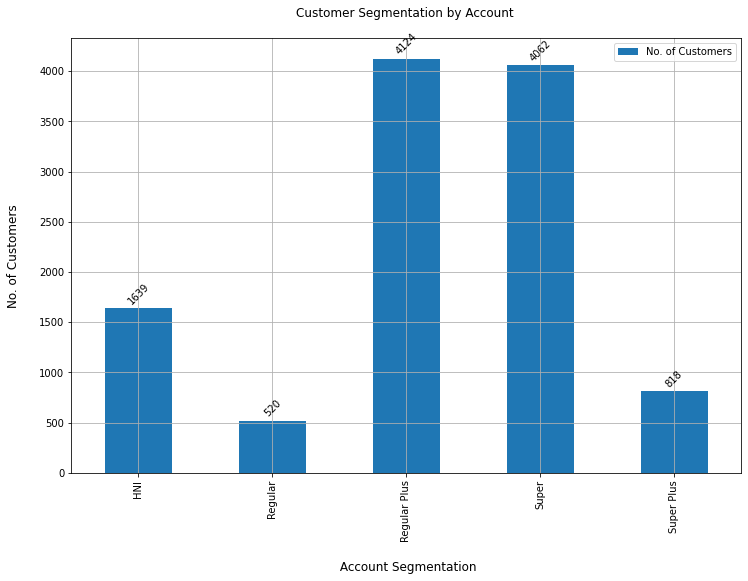

In [193]:
account_segment_split.plot(kind='bar',figsize=(12,8))
plt.title('Customer Segmentation by Account \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Account Segmentation', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

def plot_value_labels(axis, spacing = 5):
    rects = axis.patches
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)

        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)    

plot_value_labels(plt.gca())
plt.grid("True")
plt.show()

In [194]:
marital_status_split = churn[[ "AccountID", "Marital_Status"]]
sectors = marital_status_split.groupby("Marital_Status")
marital_status_split  = pd.DataFrame(sectors["AccountID"].count())
marital_status_split.rename(columns={'AccountID':'No. of Customers'}, inplace=True)
print(marital_status_split)

                No. of Customers
Marital_Status                  
Divorced                    1668
Married                     5860
Single                      3520


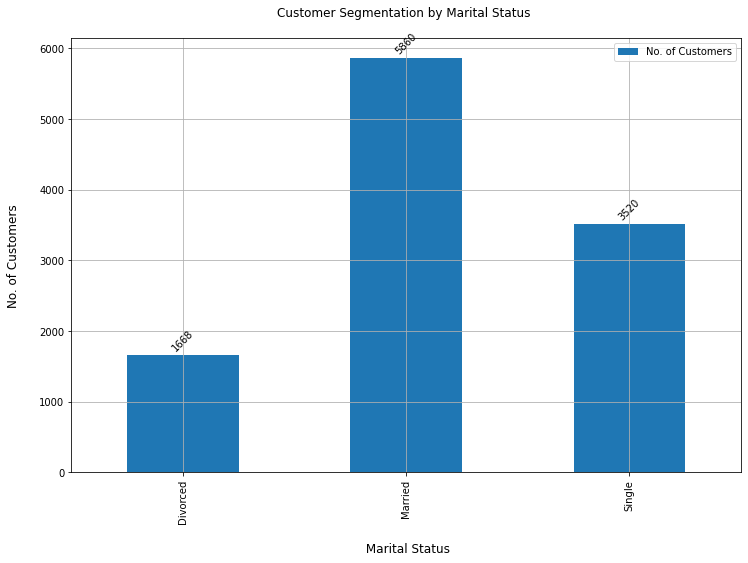

In [195]:
marital_status_split.plot(kind='bar',figsize=(12,8))
plt.title('Customer Segmentation by Marital Status \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Marital Status', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

def plot_value_labels(axis, spacing = 5):
    rects = axis.patches
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)

        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)    

plot_value_labels(plt.gca())
plt.grid("True")
plt.show()

In [196]:
complains_split = churn[[ "AccountID", "Complain_ly"]]
complains_split ["complain"] = pd.Series(np.where((complains_split["Complain_ly"] == 0), "No", "Yes"))
sectors = complains_split.groupby("complain")
complains_split  = pd.DataFrame(sectors["AccountID"].count())
complains_split.rename(columns={'AccountID':'No. of Customers'}, inplace=True)
print(complains_split)

          No. of Customers
complain                  
No                    7792
Yes                   3468


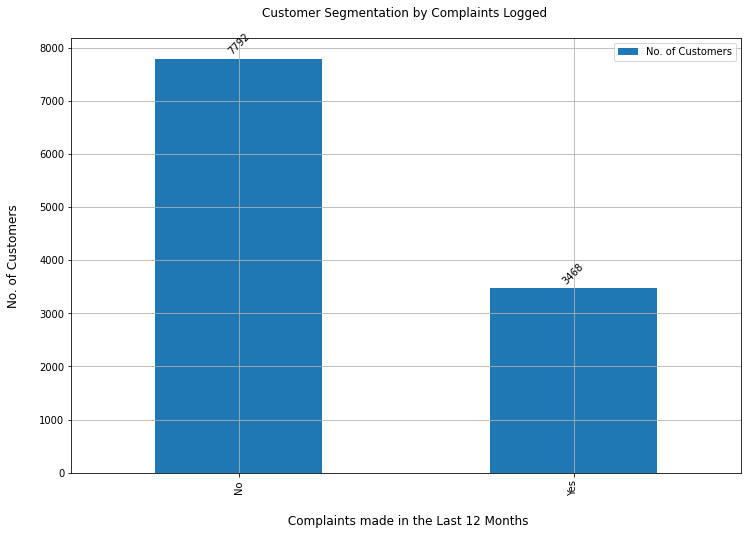

In [197]:
complains_split.plot(kind='bar',figsize=(12,8))
plt.title('Customer Segmentation by Complaints Logged \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Complaints made in the Last 12 Months', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

def plot_value_labels(axis, spacing = 5):
    rects = axis.patches
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)

        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)    

plot_value_labels(plt.gca())
plt.grid("True")
plt.show()

In [198]:
login_device_split = churn[[ "AccountID", "Login_device"]]
sectors = login_device_split.groupby("Login_device")
login_device_split  = pd.DataFrame(sectors["AccountID"].count())
login_device_split.rename(columns={'AccountID':'No. of Customers'}, inplace=True)
print(login_device_split)

              No. of Customers
Login_device                  
Computer                  3018
Mobile                    7482


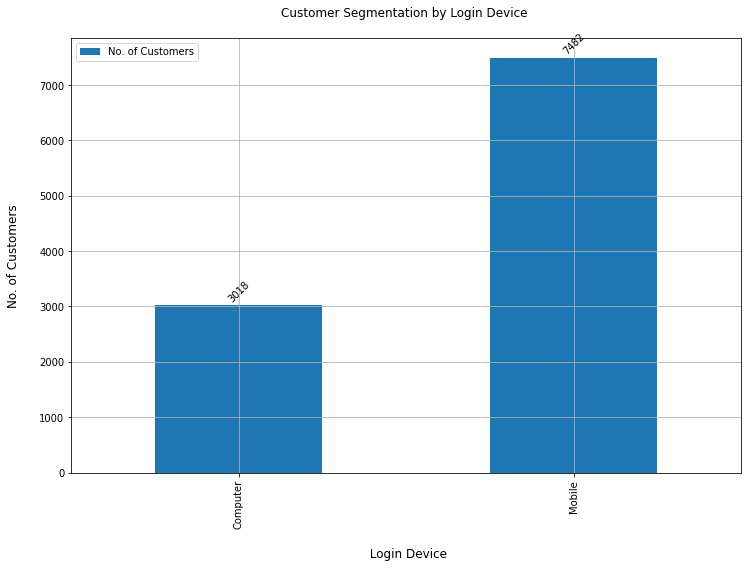

In [199]:
login_device_split.plot(kind='bar',figsize=(12,8))
plt.title('Customer Segmentation by Login Device \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.ylabel('No. of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Login Device', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

def plot_value_labels(axis, spacing = 5):
    rects = axis.patches
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)

        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', 
                      rotation=45, 
                      va=va)    

plot_value_labels(plt.gca())
plt.grid("True")
plt.show()

In [200]:
churn_rate = churn[["Churn", "AccountID"]]
churn_rate ["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate.groupby ("churn_label")
churn_rate = pd.DataFrame(sectors["AccountID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["AccountID"]/ sum(churn_rate ["AccountID"]) )*100
print(churn_rate)

             AccountID  Churn Rate
churn_label                       
No                9364       83.16
Yes               1896       16.84


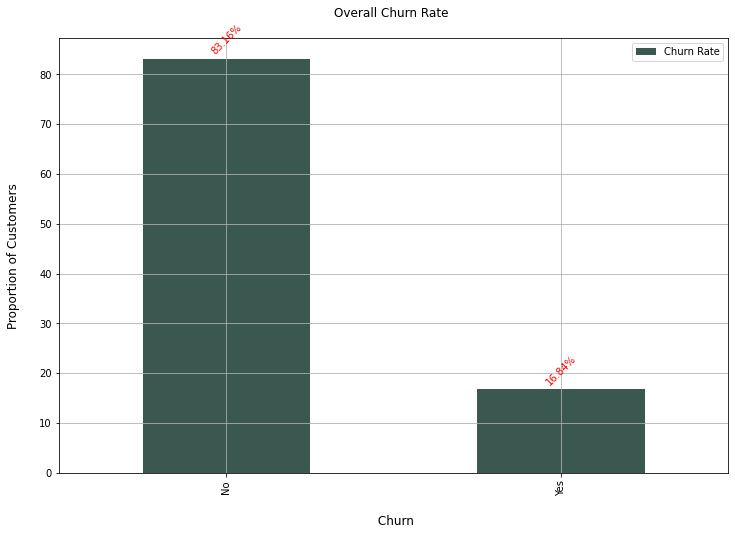

In [201]:
churn_rate['Churn Rate'].plot(kind='bar',color= '#3A584F', legend=True,figsize=(12,8))
plt.title('Overall Churn Rate \n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.ylabel('Proportion of Customers\n', horizontalalignment = "center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Churn', horizontalalignment = "center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

def plot_value_labels(axis, spacing = 5):
    rects = axis.patches
    for rect in rects:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing        
        va = 'bottom'
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.2f}%".format(y_value)

        # Create annotation here
        axis.annotate(label, (x_value, y_value), 
                      xytext=(0, 2), 
                      textcoords="offset points", 
                      ha='center', color='red',
                      rotation=45, 
                      va=va)    

plot_value_labels(plt.gca())
plt.grid("True")
plt.show()

In [202]:
city_tier_churn = churn.groupby(['City_Tier','Churn']).size().unstack()
city_tier_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
print(city_tier_churn)

Churn        No   Yes
City_Tier            
Tier 1     6207  1056
Tier 2      384    96
Tier 3     2678   727


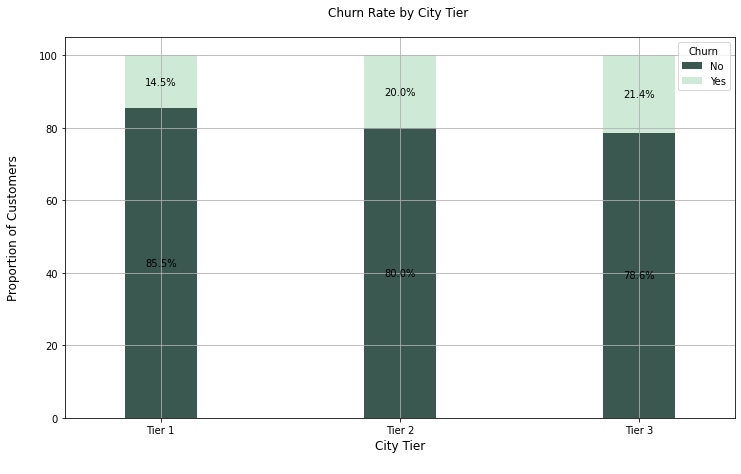

In [247]:
colors  = ['#3A584F','#CEEAD6']
axis = (city_tier_churn.T*100.0 / city_tier_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('City Tier\n',horizontalalignment = "center", fontstyle = "normal", fontsize = "large",  fontfamily = "sans-serif")

plt.title('Churn Rate by City Tier \n', horizontalalignment ="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

for p in axis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axis.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.grid("True")
plt.show()

In [204]:
payment_churn = churn.groupby(['Payment','Churn']).size().unstack()
payment_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
print(payment_churn)

Churn               No  Yes
Payment                    
Cash on Delivery   760  254
Credit Card       3012  499
Debit Card        3885  702
E wallet           941  276
UPI                679  143


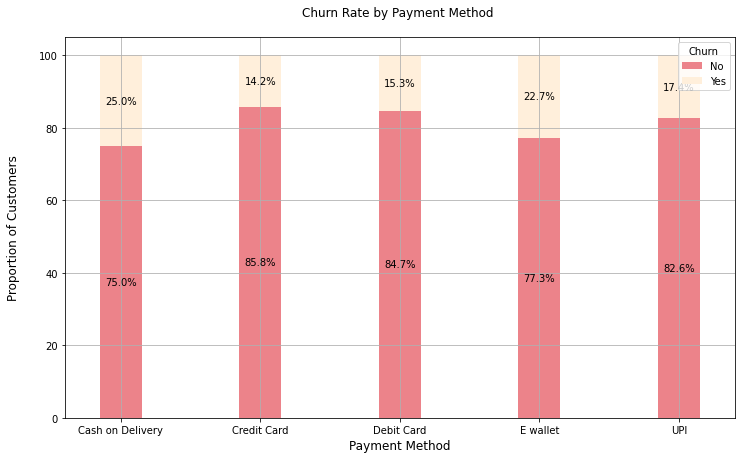

In [205]:
colors  = ['#ec838a','#ffefdb']
axis = (payment_churn.T*100.0 / payment_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Payment Method\n',horizontalalignment = "center", fontstyle = "normal", fontsize = "large",  fontfamily = "sans-serif")

plt.title('Churn Rate by Payment Method \n', horizontalalignment ="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

for p in axis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axis.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.grid("True")
plt.show()

In [206]:
gender_churn = churn.groupby(['Gender','Churn']).size().unstack()
gender_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
print(gender_churn)

Churn     No   Yes
Gender            
Female  3759   689
Male    5519  1185


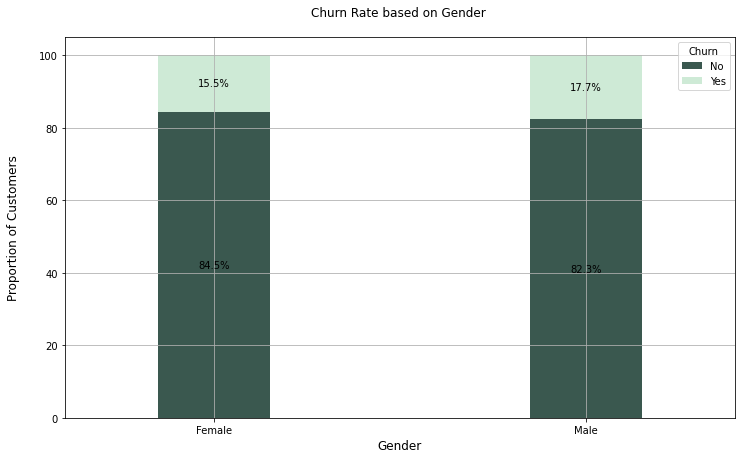

In [246]:
colors  = ['#3A584F','#CEEAD6']
axis = (gender_churn.T*100.0 / gender_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)

plt.ylabel('Proportion of Customers\n', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Gender\n',horizontalalignment = "center", fontstyle = "normal", fontsize = "large",  fontfamily = "sans-serif")

plt.title('Churn Rate based on Gender \n', horizontalalignment ="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

for p in axis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axis.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.grid("True")
plt.show()

In [208]:
account_segment_churn = churn.groupby(['account_segment','Churn']).size().unstack()
account_segment_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
print(account_segment_churn)

Churn              No   Yes
account_segment            
HNI              1384   255
Regular           480    40
Regular Plus     2997  1127
Super            3646   416
Super Plus        778    40


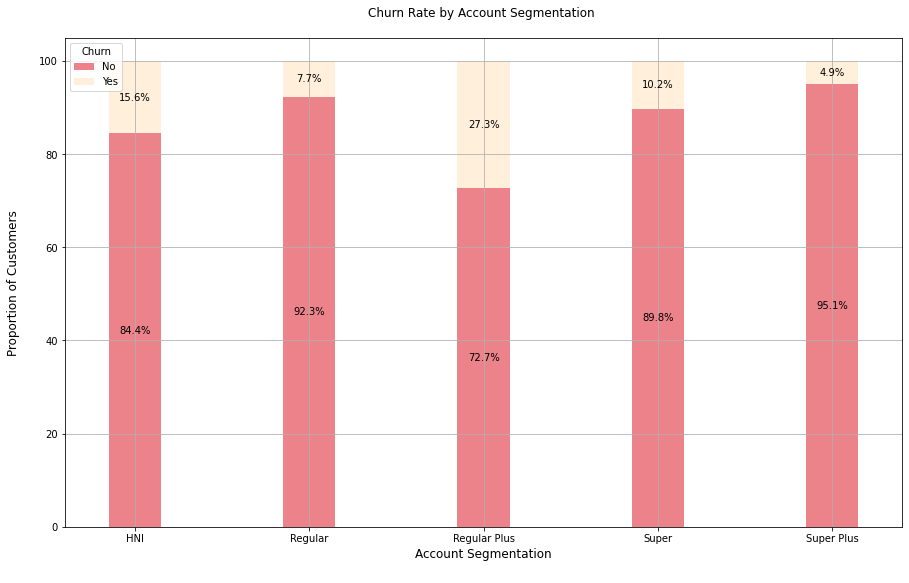

In [209]:
colors  = ['#ec838a','#ffefdb']
axis = (account_segment_churn.T*100.0 / account_segment_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (15,9),color = colors)

plt.ylabel('Proportion of Customers\n', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Account Segmentation\n',horizontalalignment = "center", fontstyle = "normal", fontsize = "large",  fontfamily = "sans-serif")

plt.title('Churn Rate by Account Segmentation \n', horizontalalignment ="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

for p in axis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axis.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.grid("True")
plt.show()

In [210]:
marital_status_churn = churn.groupby(['Marital_Status','Churn']).size().unstack()
marital_status_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
print(marital_status_churn)

Churn             No  Yes
Marital_Status           
Divorced        1424  244
Married         5187  673
Single          2573  947


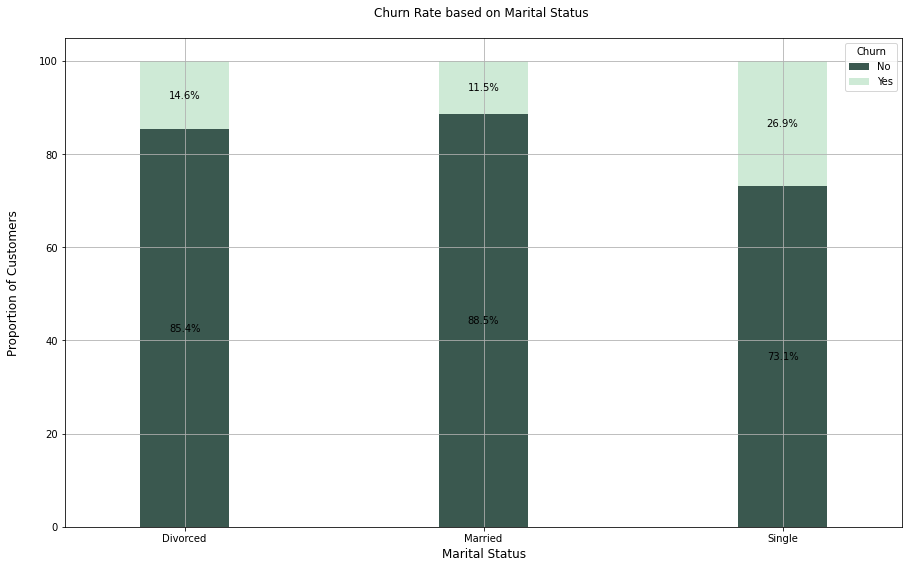

In [243]:
colors  = ['#3A584F','#CEEAD6']
axis = (marital_status_churn.T*100.0 / marital_status_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (15,9),color = colors)

plt.ylabel('Proportion of Customers\n', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Marital Status\n',horizontalalignment = "center", fontstyle = "normal", fontsize = "large",  fontfamily = "sans-serif")

plt.title('Churn Rate based on Marital Status \n', horizontalalignment ="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

for p in axis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axis.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.grid("True")
plt.show()

In [212]:
complain_churn = churn.groupby(['Complain_ly','Churn']).size().unstack()
complain_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
print(complain_churn)

Churn          No  Yes
Complain_ly           
0.00         6942  850
1.00         2123  988


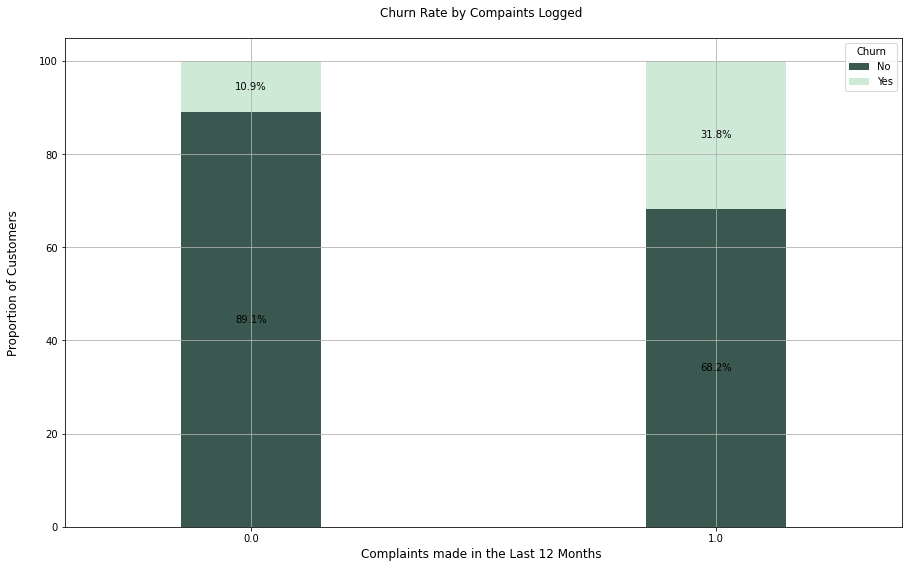

In [244]:
colors  = ['#3A584F','#CEEAD6']
axis = (complain_churn.T*100.0 / complain_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (15,9),color = colors)

plt.ylabel('Proportion of Customers\n', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Complaints made in the Last 12 Months \n',horizontalalignment = "center", fontstyle = "normal", fontsize = "large",  fontfamily = "sans-serif")

plt.title('Churn Rate by Compaints Logged \n', horizontalalignment ="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

for p in axis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axis.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.grid("True")
plt.show()

In [214]:
login_device_churn = churn.groupby(['Login_device','Churn']).size().unstack()
login_device_churn.rename(columns={0:'No', 1:'Yes'}, inplace=True)
print(login_device_churn)

Churn           No   Yes
Login_device            
Computer      2421   597
Mobile        6310  1172


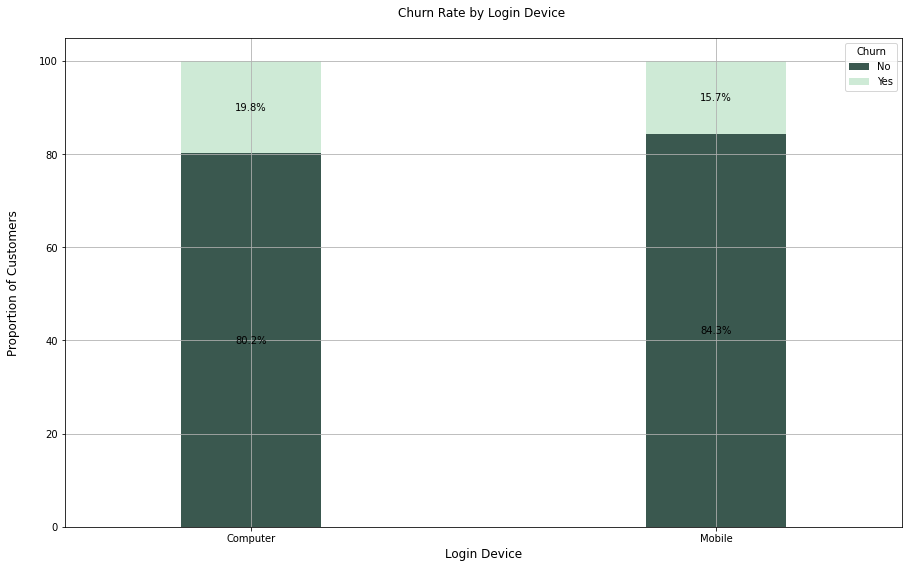

In [245]:
colors  = ['#3A584F','#CEEAD6']
axis = (login_device_churn.T*100.0 / login_device_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (15,9),color = colors)

plt.ylabel('Proportion of Customers\n', horizontalalignment = "center",fontstyle = "normal",  fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('Login Device\n',horizontalalignment = "center", fontstyle = "normal", fontsize = "large",  fontfamily = "sans-serif")

plt.title('Churn Rate by Login Device \n', horizontalalignment ="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")

for p in axis.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    axis.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')

plt.grid("True")
plt.show()

### Pair Plot Analysis

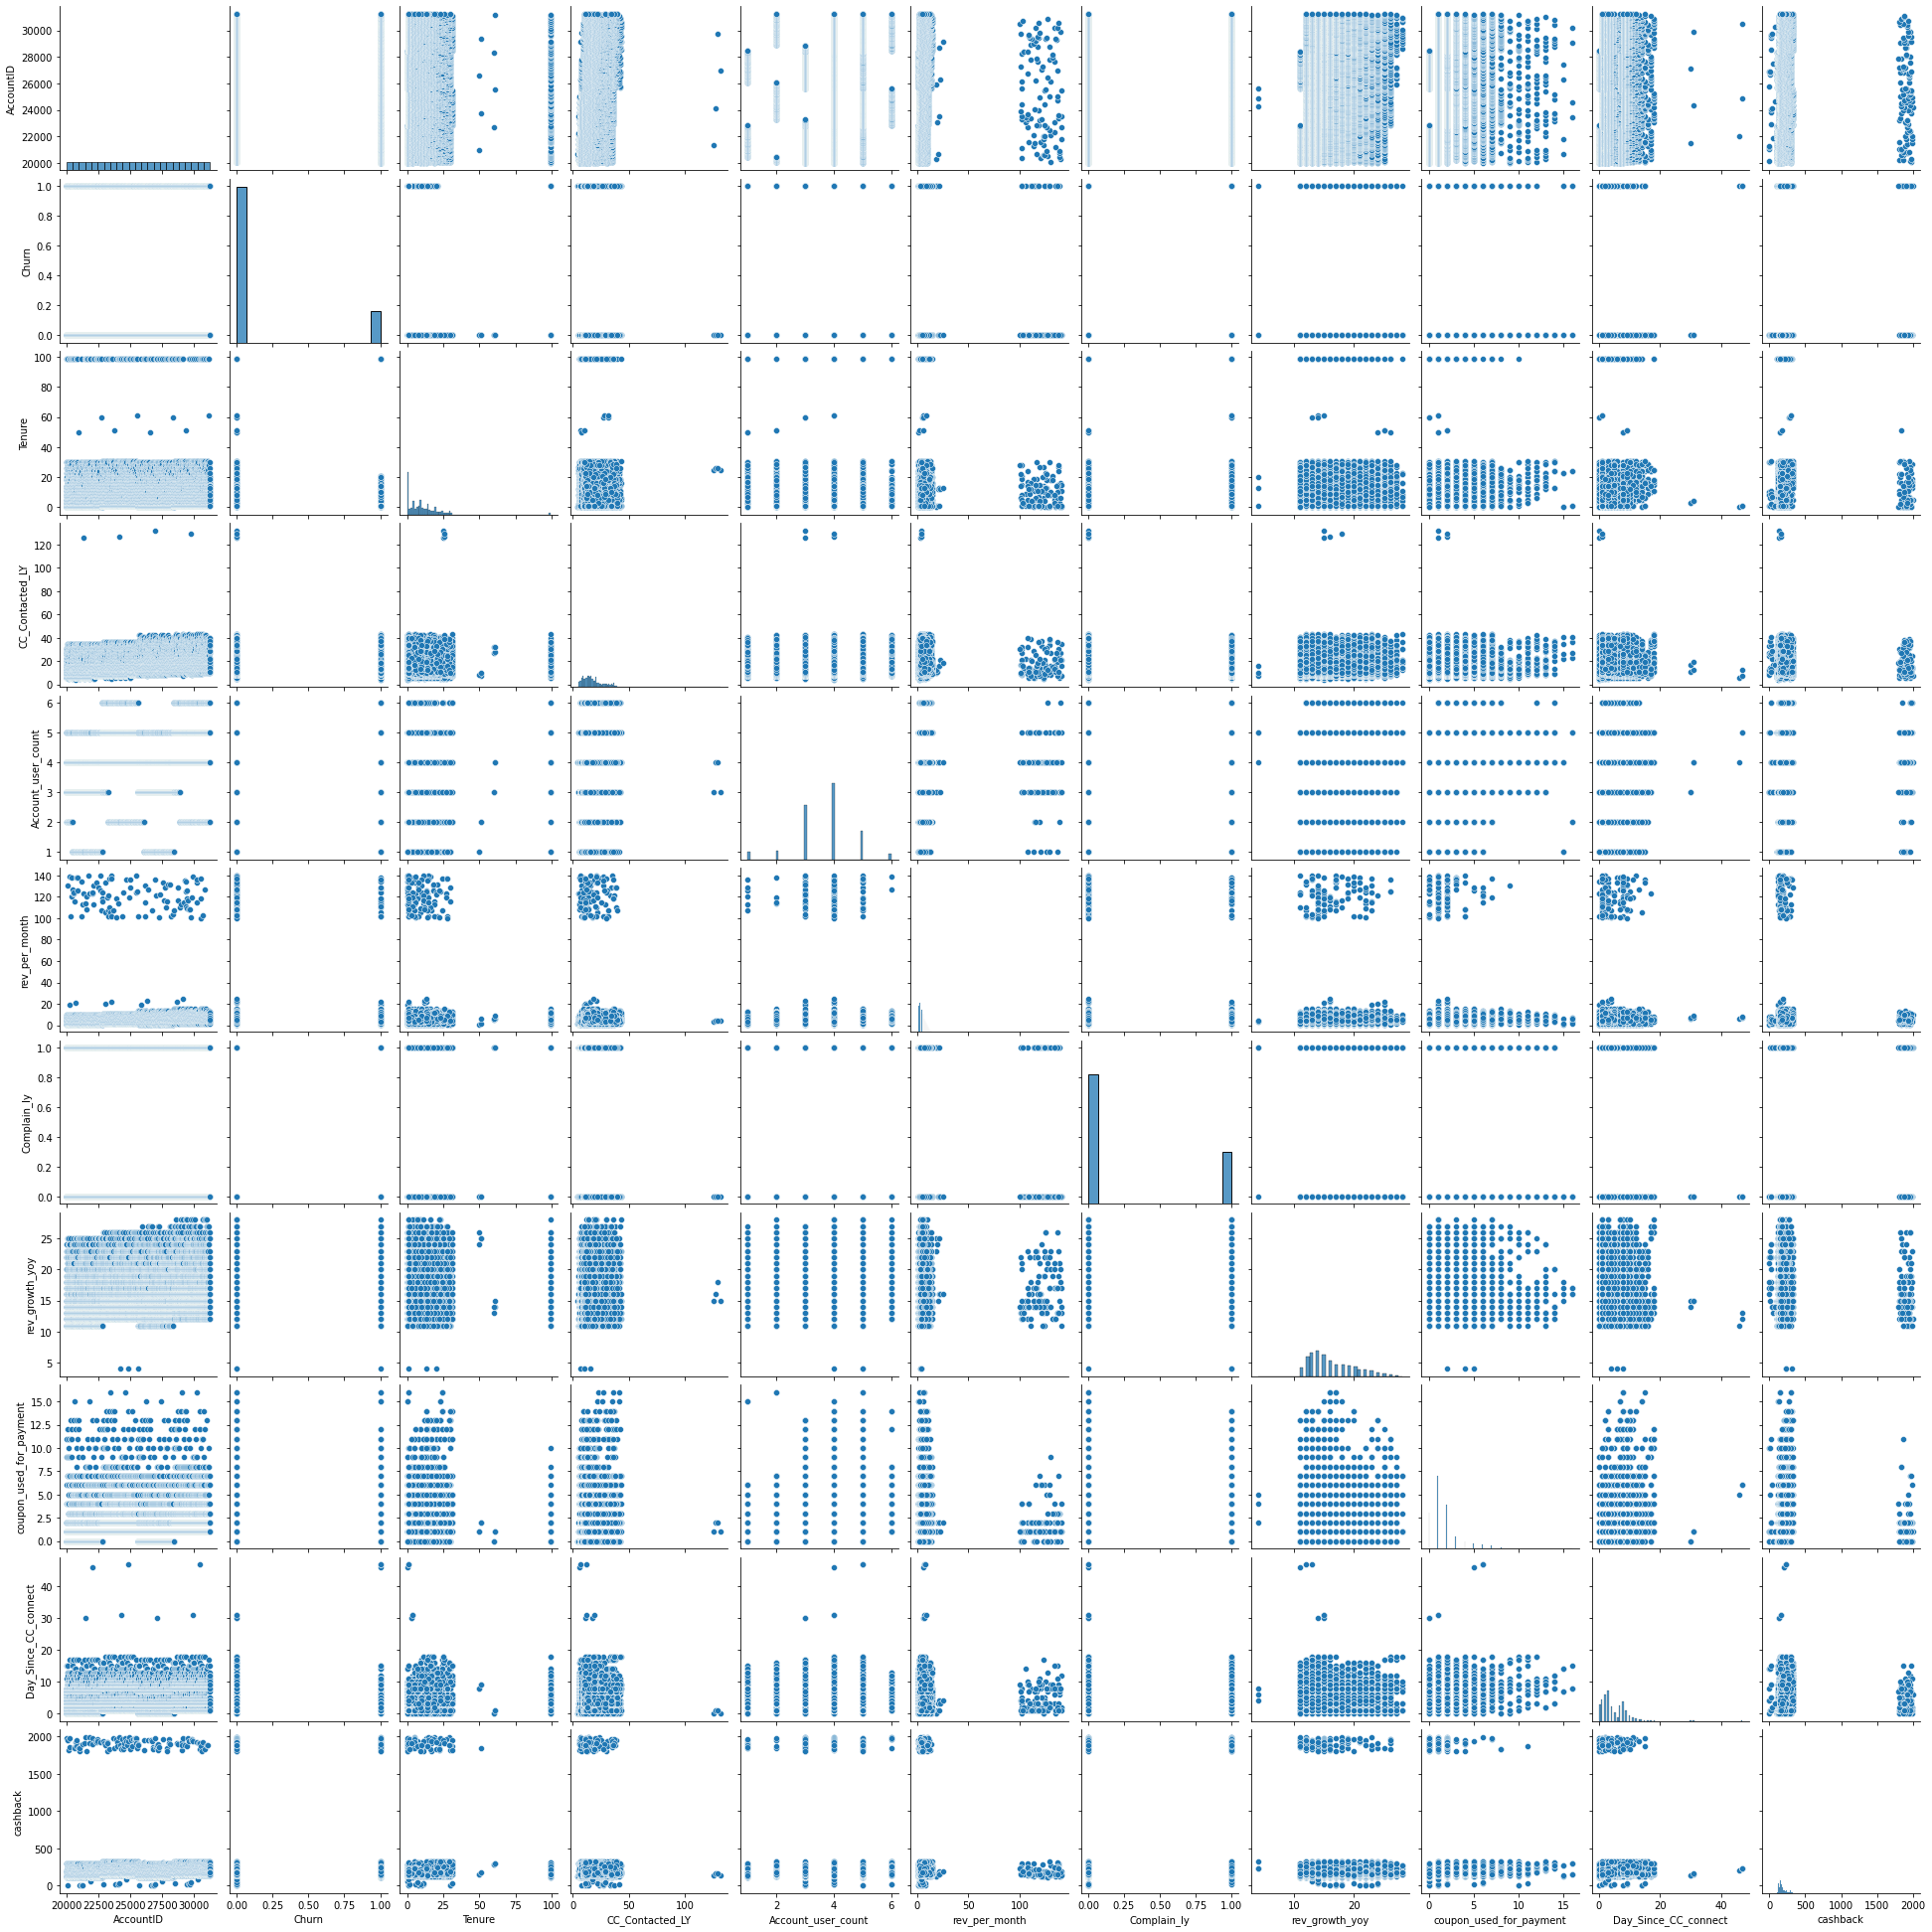

In [216]:
sns.pairplot(churn[['AccountID','Churn', 'Tenure', 'CC_Contacted_LY','Account_user_count','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']]);

### Correlation Analysis

In [217]:
corr = churn.corr()
corr

,AccountID,Churn,Tenure,CC_Contacted_LY,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback
AccountID,1.00,-0.01,0.01,0.25,0.20,-0.02,0.07,-0.01,0.17,0.11,0.06,0.03
Churn,-0.01,1.00,-0.23,0.07,0.11,0.11,0.02,0.25,-0.01,-0.01,-0.15,-0.03
Tenure,0.01,-0.23,1.00,-0.00,-0.00,-0.02,0.03,-0.02,0.02,0.09,0.12,0.08
CC_Contacted_LY,0.25,0.07,-0.00,1.00,0.02,-0.00,0.02,0.03,0.07,0.00,0.01,0.00
Account_user_count,0.20,0.11,-0.00,0.02,1.00,-0.02,0.02,0.00,0.07,0.15,0.04,0.04
CC_Agent_Score,-0.02,0.11,-0.02,-0.00,-0.02,1.00,0.02,-0.03,-0.03,0.03,0.03,-0.01
rev_per_month,0.07,0.02,0.03,0.02,0.02,0.02,1.00,-0.00,0.02,0.02,-0.00,0.00
Complain_ly,-0.01,0.25,-0.02,0.03,0.00,-0.03,-0.00,1.00,-0.01,-0.01,-0.04,0.01
rev_growth_yoy,0.17,-0.01,0.02,0.07,0.07,-0.03,0.02,-0.01,1.00,0.02,0.00,-0.00
coupon_used_for_payment,0.11,-0.01,0.09,0.00,0.15,0.03,0.02,-0.01,0.02,1.00,0.36,0.07


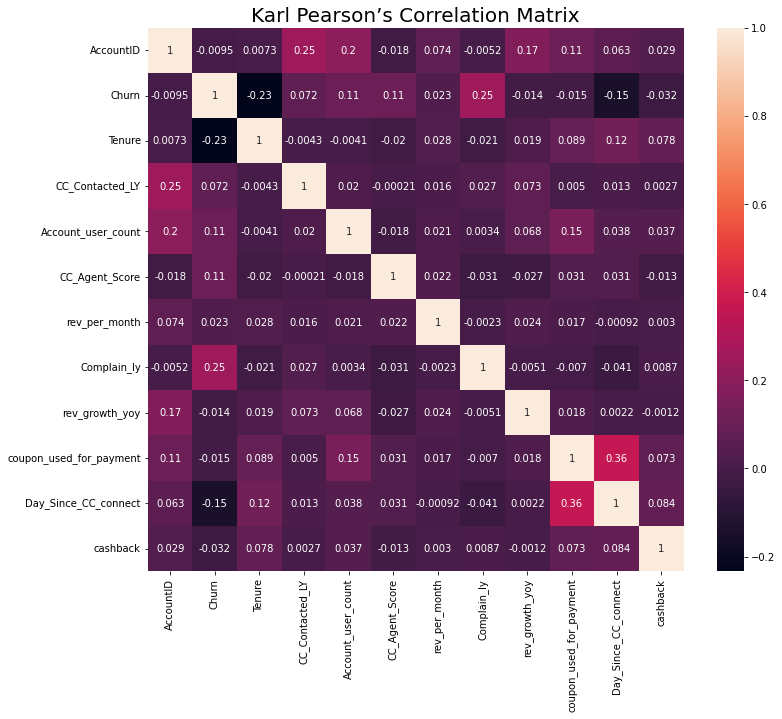

In [218]:
fig = plt.subplots(figsize=(12,10)) 
sns.heatmap(corr, annot=True)
plt.title("Karl Pearson’s Correlation Matrix", fontsize =20);

### Converting Data Types

In [219]:
churn['Service_Score'] = churn['Service_Score'].astype(str)

In [220]:
churn['CC_Agent_Score'] = churn['CC_Agent_Score'].astype(str)

In [221]:
churn['Complain_ly'] = churn['Complain_ly'].astype(str)

In [222]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11148 non-null  object 
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11260 non-null  object 
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11260 non-null  object 
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              11260 non-null  object 
 14  rev_growth_yoy        

### Label Encoding

In [223]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

churn['City_Tier']= label_encoder.fit_transform(churn['City_Tier'])
churn['Payment']= label_encoder.fit_transform(churn['Payment']) 
churn['Gender']= label_encoder.fit_transform(churn['Gender'])
churn['account_segment']= label_encoder.fit_transform(churn['account_segment']) 
churn['Marital_Status']= label_encoder.fit_transform(churn['Marital_Status'])
churn['Login_device']= label_encoder.fit_transform(churn['Login_device'])
 
churn.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4.00,2,6.00,2,0,3.0,3.00,3,2.0,2,9.00,1.0,11.00,1.00,5.00,159.93,1
1,20001,1,0.00,0,8.00,4,1,3.0,4.00,2,3.0,2,7.00,1.0,15.00,0.00,0.00,120.90,1
2,20002,1,0.00,0,30.00,2,1,2.0,4.00,2,3.0,2,6.00,1.0,14.00,0.00,3.00,NaN,1
3,20003,1,0.00,2,15.00,2,1,2.0,4.00,3,5.0,2,8.00,0.0,23.00,0.00,3.00,134.07,1
4,20004,1,0.00,0,12.00,1,1,2.0,3.00,2,5.0,2,3.00,0.0,11.00,1.00,3.00,129.60,1


In [224]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  float64
 3   City_Tier                11260 non-null  int32  
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11260 non-null  int32  
 6   Gender                   11260 non-null  int32  
 7   Service_Score            11260 non-null  object 
 8   Account_user_count       10816 non-null  float64
 9   account_segment          11260 non-null  int32  
 10  CC_Agent_Score           11260 non-null  object 
 11  Marital_Status           11260 non-null  int32  
 12  rev_per_month            10469 non-null  float64
 13  Complain_ly              11260 non-null  object 
 14  rev_growth_yoy        

### Treating Missing Values

#### Segregate the predictors and response 

In [225]:
churn_temp = churn
predictors = churn_temp.drop('Churn', axis = 1)
response = churn_temp['Churn']

#### Scale the predictors 

In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [227]:
Churn = pd.concat([scaled_predictors, response], axis = 1)

#### Imputing the remaining missing values

In [228]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=10)

In [229]:
Churn_Data = pd.DataFrame(imputer.fit_transform(Churn), columns = Churn.columns)
Churn_Data.isnull().sum()

AccountID                  0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
Churn                      0
dtype: int64

In [230]:
Churn_Data.isnull().sum().sum()

0

The missing values have been successfully imputed.

### Check for Outlier Values

In [231]:
churn_X = Churn_Data.drop('Churn', axis = 1)
churn_Y = Churn_Data['Churn']

churn_X.head()

,AccountID,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,-1.73,-0.55,1.41,-1.34,0.20,-1.21,0.13,-0.68,0.70,-0.77,1.13,0.22,1.58,-1.38,-0.40,0.10,-0.20,0.37
1,-1.73,-0.86,-0.72,-1.11,2.09,0.76,0.13,0.30,-0.17,-0.05,1.13,0.05,1.58,-0.32,-0.91,-1.25,-0.42,0.37
2,-1.73,-0.86,-0.72,1.37,0.20,0.76,-1.25,0.30,-0.17,-0.05,1.13,-0.03,1.58,-0.58,-0.91,-0.44,-0.37,0.37
3,-1.73,-0.86,1.41,-0.32,0.20,0.76,-1.25,0.30,0.70,1.40,1.13,0.14,-0.63,1.81,-0.91,-0.44,-0.35,0.37
4,-1.73,-0.86,-0.72,-0.66,-0.75,0.76,-1.25,-0.68,-0.17,1.40,1.13,-0.28,-0.63,-1.38,-0.40,-0.44,-0.37,0.37


In [232]:
Q1, Q3 = Churn_Data['Churn'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [233]:
((churn_X > UL) | (churn_X < LL)).sum()

AccountID                  11260
Tenure                     11260
City_Tier                  11260
CC_Contacted_LY            11260
Payment                    11260
Gender                     11260
Service_Score              11260
Account_user_count         11260
account_segment            11260
CC_Agent_Score             11260
Marital_Status             11260
rev_per_month              11260
Complain_ly                11260
rev_growth_yoy             11260
coupon_used_for_payment    11260
Day_Since_CC_connect       11260
cashback                   11260
Login_device               11260
dtype: int64

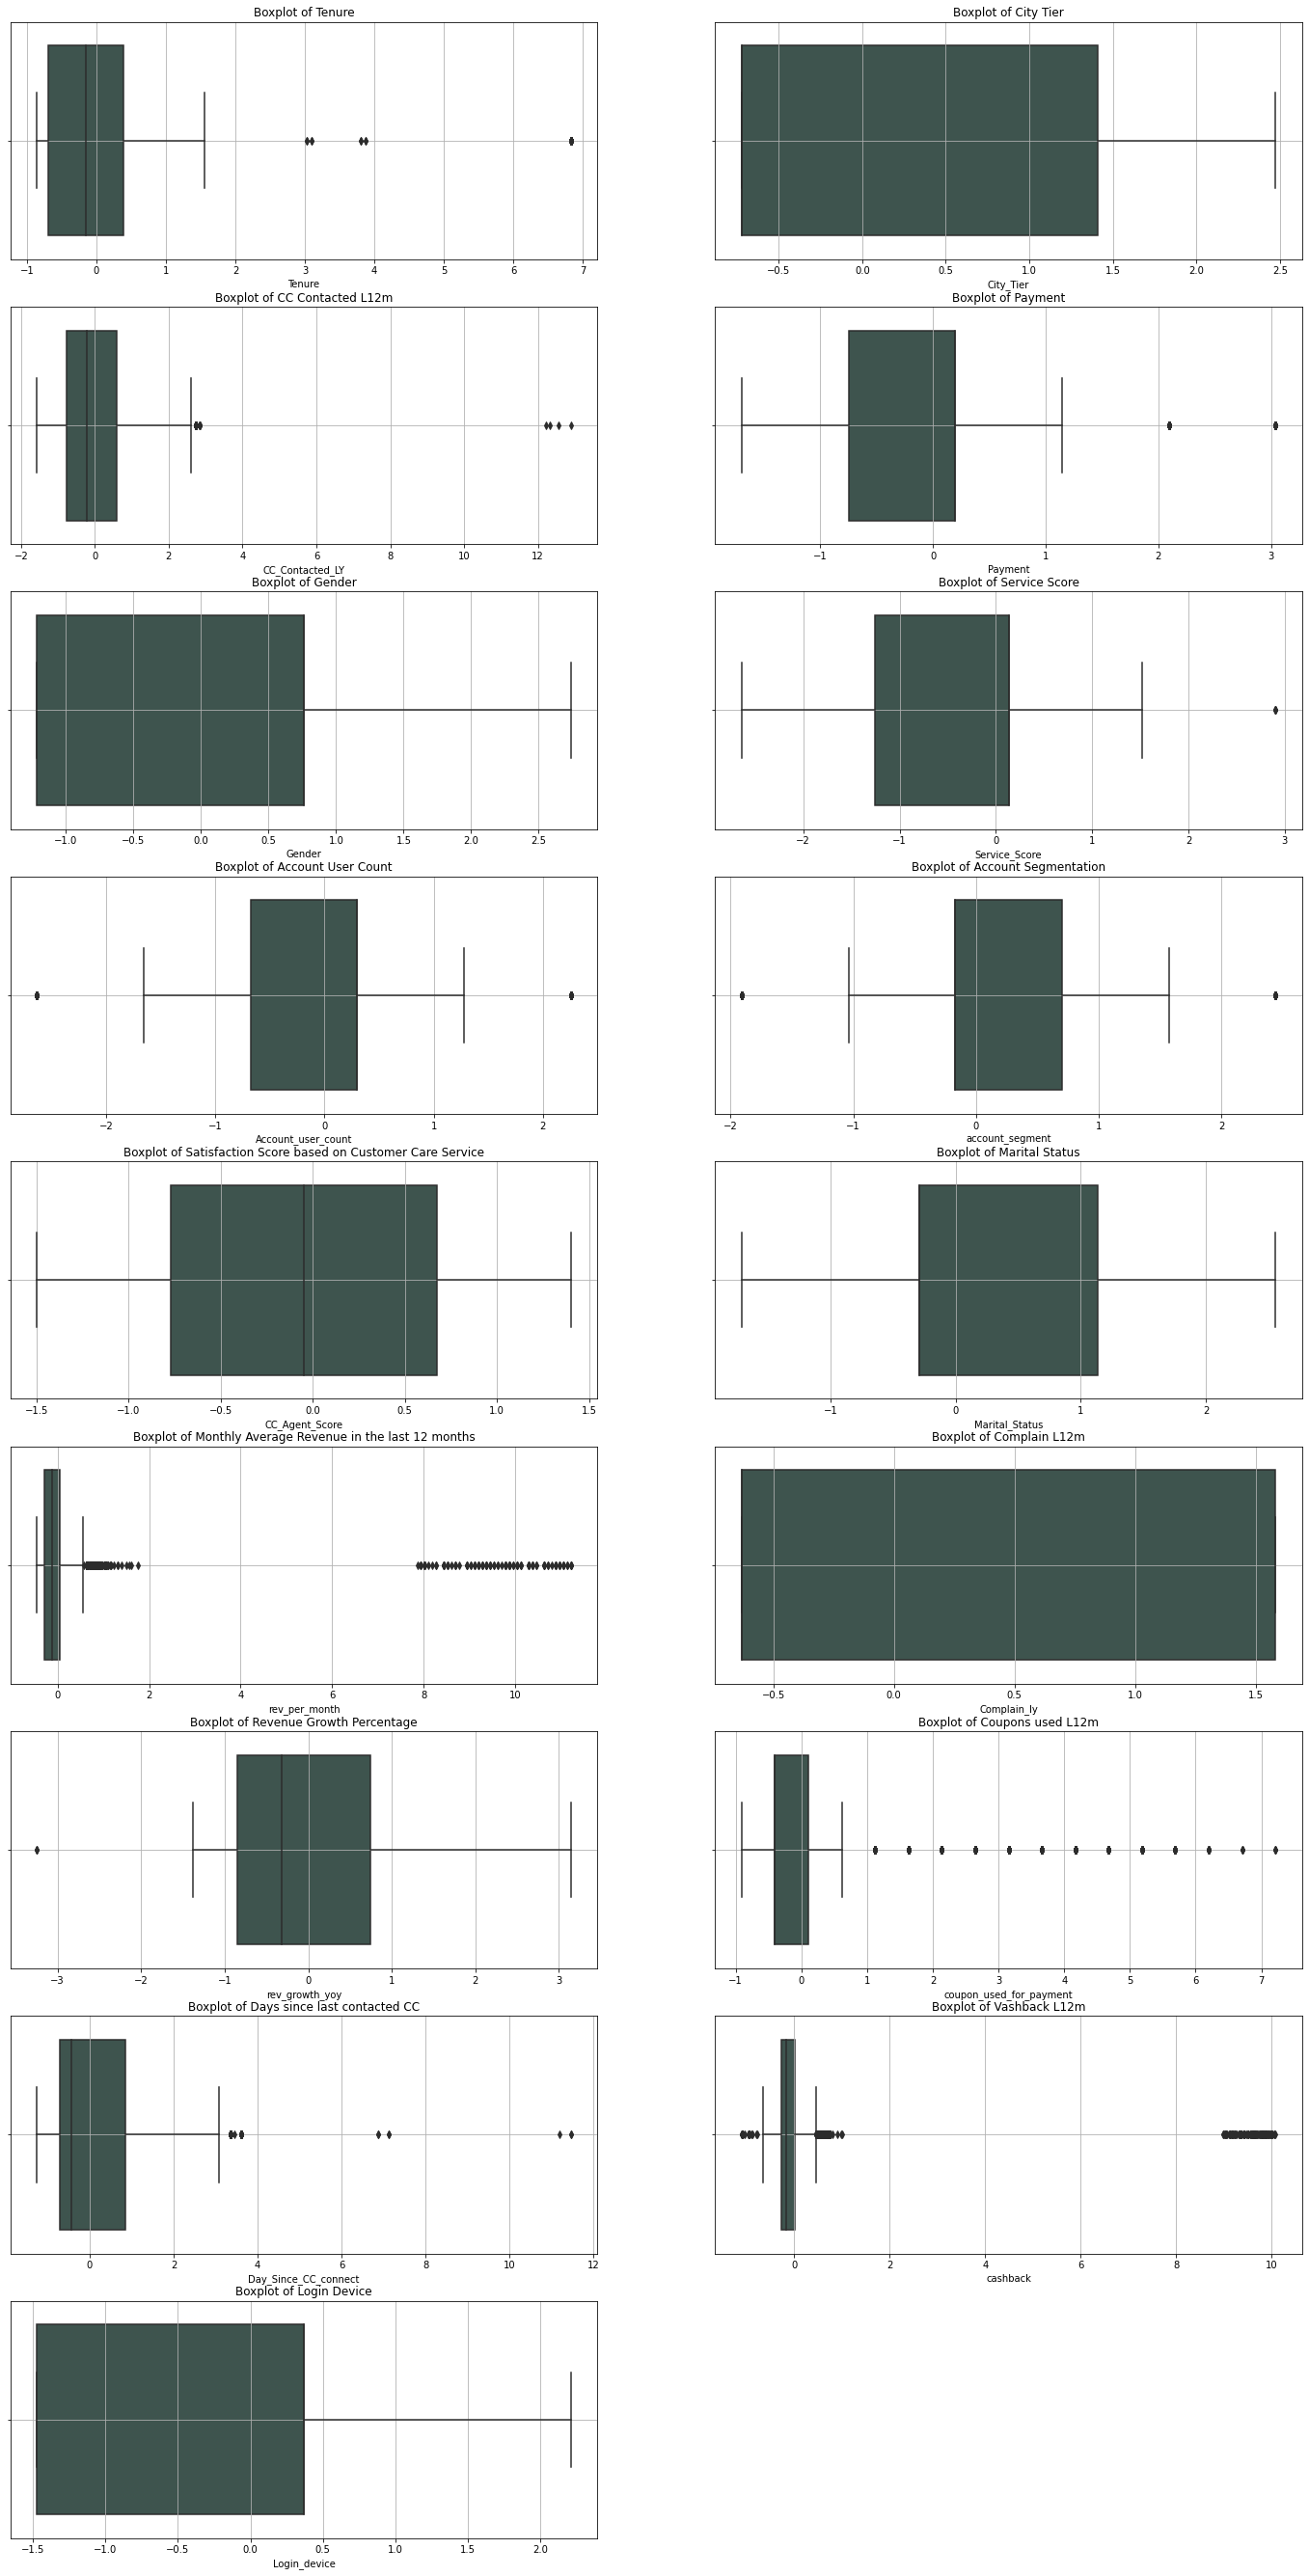

In [234]:
plt.figure(figsize=[24, 48])

plt.subplot(9, 2, 1)
sns.boxplot(churn_X['Tenure'], color='#3A584F', orient = "h");
plt.title("Boxplot of Tenure") 
plt.grid("True")

plt.subplot(9, 2, 2)
sns.boxplot(churn_X['City_Tier'], color='#3A584F', orient = "h");
plt.title("Boxplot of City Tier")
plt.grid("True")

plt.subplot(9, 2, 3)
sns.boxplot(churn_X['CC_Contacted_LY'], color='#3A584F', orient = "h");
plt.title("Boxplot of CC Contacted L12m")
plt.grid("True")

plt.subplot(9, 2, 4)
sns.boxplot(churn_X['Payment'], color='#3A584F', orient = "h");
plt.title("Boxplot of Payment")
plt.grid("True")

plt.subplot(9, 2, 5)
sns.boxplot(churn_X['Gender'], color='#3A584F', orient = "h");
plt.title("Boxplot of Gender")
plt.grid("True")

plt.subplot(9, 2, 6)
sns.boxplot(churn_X['Service_Score'], color='#3A584F', orient = "h");
plt.title("Boxplot of Service Score")
plt.grid("True")

plt.subplot(9, 2, 7)
sns.boxplot(churn_X['Account_user_count'], color='#3A584F', orient = "h");
plt.title("Boxplot of Account User Count")
plt.grid("True")

plt.subplot(9, 2, 8)
sns.boxplot(churn_X['account_segment'], color='#3A584F', orient = "h");
plt.title("Boxplot of Account Segmentation")
plt.grid("True")

plt.subplot(9, 2, 9)
sns.boxplot(churn_X['CC_Agent_Score'], color='#3A584F', orient = "h");
plt.title("Boxplot of Satisfaction Score based on Customer Care Service")
plt.grid("True")

plt.subplot(9, 2, 10)
sns.boxplot(churn_X['Marital_Status'], color='#3A584F', orient = "h");
plt.title("Boxplot of Marital Status")
plt.grid("True")

plt.subplot(9, 2, 11)
sns.boxplot(churn_X['rev_per_month'], color='#3A584F', orient = "h");
plt.title("Boxplot of Monthly Average Revenue in the last 12 months")
plt.grid("True")

plt.subplot(9, 2, 12)
sns.boxplot(churn_X['Complain_ly'], color='#3A584F', orient = "h");
plt.title("Boxplot of Complain L12m")
plt.grid("True")

plt.subplot(9, 2, 13)
sns.boxplot(churn_X['rev_growth_yoy'], color='#3A584F', orient = "h");
plt.title("Boxplot of Revenue Growth Percentage")
plt.grid("True")

plt.subplot(9, 2, 14)
sns.boxplot(churn_X['coupon_used_for_payment'], color='#3A584F', orient = "h");
plt.title("Boxplot of Coupons used L12m")
plt.grid("True")

plt.subplot(9, 2, 15)
sns.boxplot(churn_X['Day_Since_CC_connect'], color='#3A584F', orient = "h");
plt.title("Boxplot of Days since last contacted CC")
plt.grid("True")

plt.subplot(9, 2, 16)
sns.boxplot(churn_X['cashback'], color='#3A584F', orient = "h");
plt.title("Boxplot of Vashback L12m")
plt.grid("True")

plt.subplot(9, 2, 17)
sns.boxplot(churn_X['Login_device'], color='#3A584F', orient = "h");
plt.title("Boxplot of Login Device")
plt.grid("True")

plt.show()

There are outlier values in the dataset.

### Treating Outliers

In [235]:
col = ['Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score'
       ,'Account_user_count','account_segment','CC_Agent_Score','Marital_Status'
       ,'rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment'
       ,'Day_Since_CC_connect','cashback','Login_device']

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [236]:
for column in churn_X.columns:
    lr,ur=remove_outlier(Churn_Data[column])
    churn_X[column]=np.where(churn_X[column]>ur,ur,churn_X[column])
    churn_X[column]=np.where(churn_X[column]<lr,lr,churn_X[column])

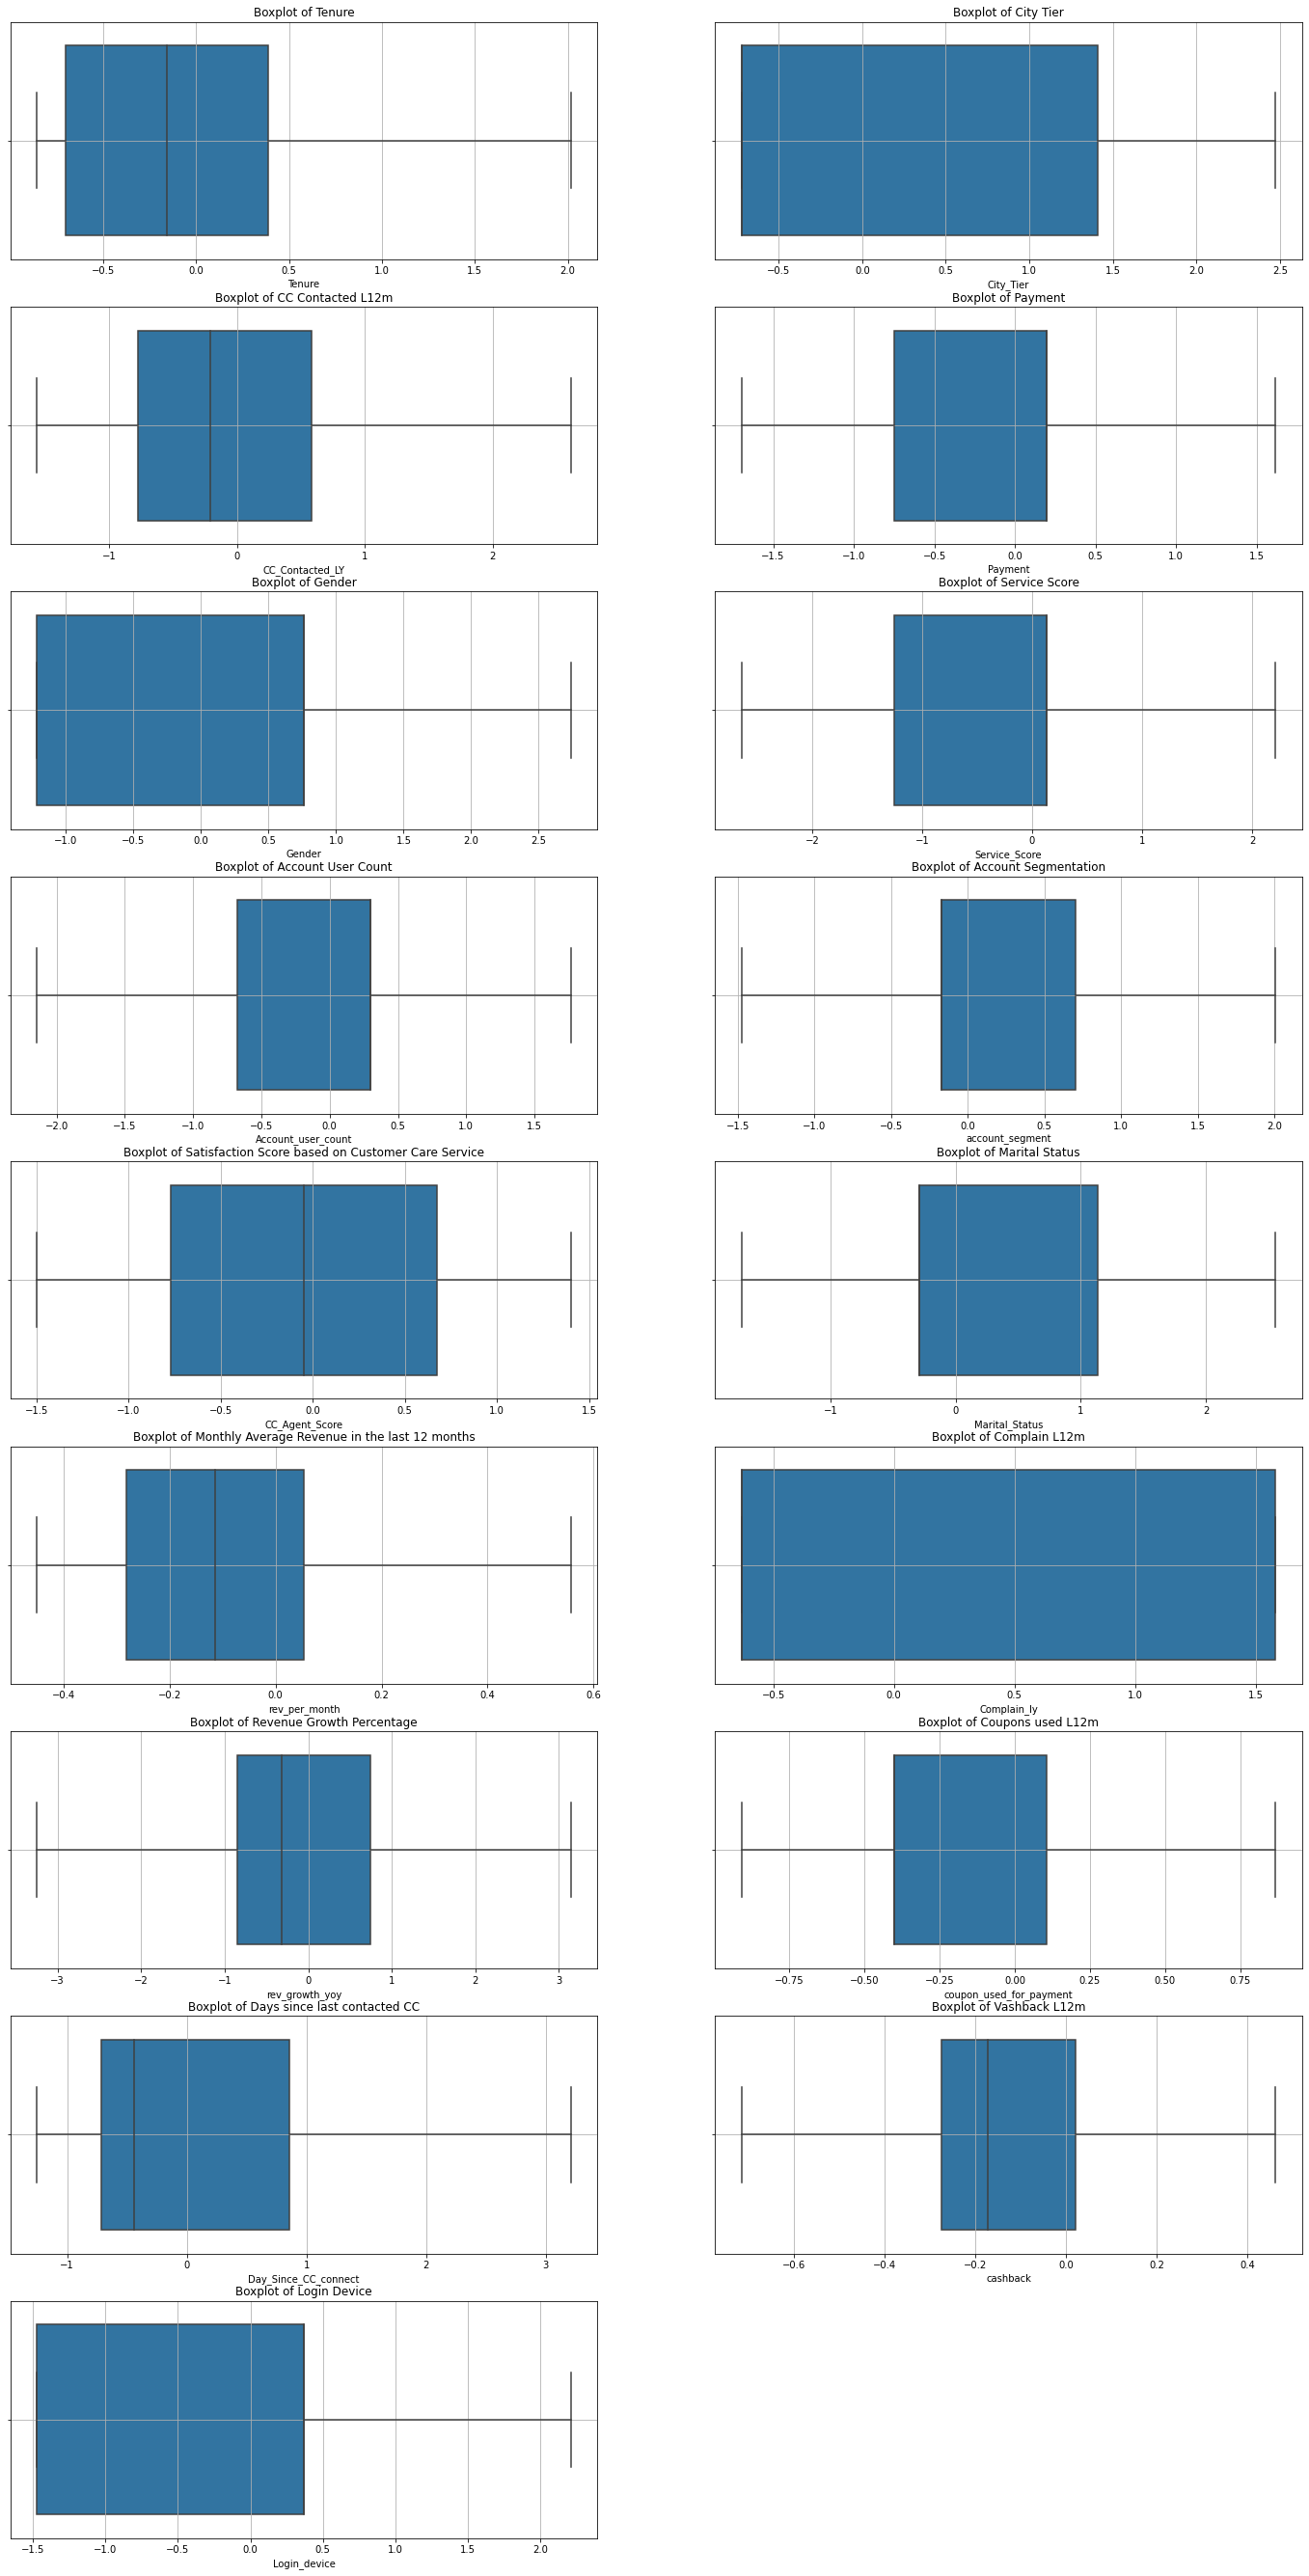

In [237]:
plt.figure(figsize=[24, 48])

plt.subplot(9, 2, 1)
sns.boxplot(churn_X['Tenure'], orient = "h");
plt.title("Boxplot of Tenure") 
plt.grid("True")

plt.subplot(9, 2, 2)
sns.boxplot(churn_X['City_Tier'], orient = "h");
plt.title("Boxplot of City Tier")
plt.grid("True")

plt.subplot(9, 2, 3)
sns.boxplot(churn_X['CC_Contacted_LY'], orient = "h");
plt.title("Boxplot of CC Contacted L12m")
plt.grid("True")

plt.subplot(9, 2, 4)
sns.boxplot(churn_X['Payment'], orient = "h");
plt.title("Boxplot of Payment")
plt.grid("True")

plt.subplot(9, 2, 5)
sns.boxplot(churn_X['Gender'], orient = "h");
plt.title("Boxplot of Gender")
plt.grid("True")

plt.subplot(9, 2, 6)
sns.boxplot(churn_X['Service_Score'], orient = "h");
plt.title("Boxplot of Service Score")
plt.grid("True")

plt.subplot(9, 2, 7)
sns.boxplot(churn_X['Account_user_count'], orient = "h");
plt.title("Boxplot of Account User Count")
plt.grid("True")

plt.subplot(9, 2, 8)
sns.boxplot(churn_X['account_segment'], orient = "h");
plt.title("Boxplot of Account Segmentation")
plt.grid("True")

plt.subplot(9, 2, 9)
sns.boxplot(churn_X['CC_Agent_Score'], orient = "h");
plt.title("Boxplot of Satisfaction Score based on Customer Care Service")
plt.grid("True")

plt.subplot(9, 2, 10)
sns.boxplot(churn_X['Marital_Status'], orient = "h");
plt.title("Boxplot of Marital Status")
plt.grid("True")

plt.subplot(9, 2, 11)
sns.boxplot(churn_X['rev_per_month'], orient = "h");
plt.title("Boxplot of Monthly Average Revenue in the last 12 months")
plt.grid("True")

plt.subplot(9, 2, 12)
sns.boxplot(churn_X['Complain_ly'], orient = "h");
plt.title("Boxplot of Complain L12m")
plt.grid("True")

plt.subplot(9, 2, 13)
sns.boxplot(churn_X['rev_growth_yoy'], orient = "h");
plt.title("Boxplot of Revenue Growth Percentage")
plt.grid("True")

plt.subplot(9, 2, 14)
sns.boxplot(churn_X['coupon_used_for_payment'], orient = "h");
plt.title("Boxplot of Coupons used L12m")
plt.grid("True")

plt.subplot(9, 2, 15)
sns.boxplot(churn_X['Day_Since_CC_connect'], orient = "h");
plt.title("Boxplot of Days since last contacted CC")
plt.grid("True")

plt.subplot(9, 2, 16)
sns.boxplot(churn_X['cashback'], orient = "h");
plt.title("Boxplot of Vashback L12m")
plt.grid("True")

plt.subplot(9, 2, 17)
sns.boxplot(churn_X['Login_device'], orient = "h");
plt.title("Boxplot of Login Device")
plt.grid("True")

plt.show()

The outlier values have been successfully eliminated.

In [238]:
churn_X.drop(['AccountID'], axis = 1, inplace = True)
customer_churn = pd.concat([churn_X, churn_Y], axis = 1)

customer_churn.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn
0,-0.55,1.41,-1.34,0.20,-1.21,0.13,-0.68,0.70,-0.77,1.13,0.22,1.58,-1.38,-0.40,0.10,-0.20,0.37,1.00
1,-0.86,-0.72,-1.11,1.62,0.76,0.13,0.30,-0.17,-0.05,1.13,0.05,1.58,-0.32,-0.91,-1.25,-0.42,0.37,1.00
2,-0.86,-0.72,1.37,0.20,0.76,-1.25,0.30,-0.17,-0.05,1.13,-0.03,1.58,-0.58,-0.91,-0.44,-0.37,0.37,1.00
3,-0.86,1.41,-0.32,0.20,0.76,-1.25,0.30,0.70,1.40,1.13,0.14,-0.63,1.81,-0.91,-0.44,-0.35,0.37,1.00
4,-0.86,-0.72,-0.66,-0.75,0.76,-1.25,-0.68,-0.17,1.40,1.13,-0.28,-0.63,-1.38,-0.40,-0.44,-0.37,0.37,1.00


### Extracting the target column into separate vectors for training set and test set

In [239]:
X = customer_churn.drop('Churn', axis = 1)
y = customer_churn['Churn']
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,-0.55,1.41,-1.34,0.20,-1.21,0.13,-0.68,0.70,-0.77,1.13,0.22,1.58,-1.38,-0.40,0.10,-0.20,0.37
1,-0.86,-0.72,-1.11,1.62,0.76,0.13,0.30,-0.17,-0.05,1.13,0.05,1.58,-0.32,-0.91,-1.25,-0.42,0.37
2,-0.86,-0.72,1.37,0.20,0.76,-1.25,0.30,-0.17,-0.05,1.13,-0.03,1.58,-0.58,-0.91,-0.44,-0.37,0.37
3,-0.86,1.41,-0.32,0.20,0.76,-1.25,0.30,0.70,1.40,1.13,0.14,-0.63,1.81,-0.91,-0.44,-0.35,0.37
4,-0.86,-0.72,-0.66,-0.75,0.76,-1.25,-0.68,-0.17,1.40,1.13,-0.28,-0.63,-1.38,-0.40,-0.44,-0.37,0.37


### Splitting data into training and test set

In [240]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)

### Checking the dimensions of the training and test data

In [241]:
print(X_train.shape)
print(X_test.shape)

(7882, 17)
(3378, 17)


### Treating target imbalance using SMOTE

In [242]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42, sampling_strategy = 'minority')
X_res, y_res = sm.fit_resample(X_train, y_train)
train_smote = pd.concat([X_res, y_res], axis = 1)

In [127]:
train_smote['Churn'].value_counts()

0.00    6555
1.00    6555
Name: Churn, dtype: int64

### K-Means Clustering

In [128]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3,random_state = 42)
k_means.fit(customer_churn)
labels = k_means.labels_
labels_3 = k_means.inertia_
print(labels_3)

130665.09318220615


### Optimum Clusters

In [129]:
customer_churn["Clus_kmeans"] = labels
customer_churn.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn,Clus_kmeans
0,-0.55,1.41,-1.34,0.20,-1.21,0.13,-0.68,0.70,-0.77,1.13,0.22,1.58,-1.38,-0.40,0.10,-0.20,0.37,1.00,1
1,-0.86,-0.72,-1.11,1.62,0.76,0.13,0.30,-0.17,-0.05,1.13,0.05,1.58,-0.32,-0.91,-1.25,-0.42,0.37,1.00,2
2,-0.86,-0.72,1.37,0.20,0.76,-1.25,0.30,-0.17,-0.05,1.13,-0.03,1.58,-0.58,-0.91,-0.44,-0.37,0.37,1.00,2
3,-0.86,1.41,-0.32,0.20,0.76,-1.25,0.30,0.70,1.40,1.13,0.14,-0.63,1.81,-0.91,-0.44,-0.35,0.37,1.00,1
4,-0.86,-0.72,-0.66,-0.75,0.76,-1.25,-0.68,-0.17,1.40,1.13,-0.28,-0.63,-1.38,-0.40,-0.44,-0.37,0.37,1.00,2


### Cluster Profiling

In [130]:
customer_churn['Clus_kmeans'].value_counts().sort_index()

0    3897
1    3654
2    3709
Name: Clus_kmeans, dtype: int64

In [131]:
aggregate_data = customer_churn.groupby('Clus_kmeans').mean()
aggregate_data['Frequency'] = customer_churn['Clus_kmeans'].value_counts().sort_index()
aggregate_data

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn,Frequency
Clus_kmeans,,,,,,,,,,,,,,,,,,,
0,0.02,-0.67,0.14,-0.23,-0.05,0.67,0.49,-0.04,0.04,-0.01,-0.05,-0.05,0.30,0.05,0.22,-0.05,-0.01,0.15,3897
1,-0.11,1.38,0.00,0.35,-0.04,0.00,0.06,0.18,-0.01,0.00,-0.10,0.01,-0.05,-0.14,0.03,-0.07,-0.01,0.21,3654
2,-0.08,-0.65,-0.17,-0.25,0.09,-0.71,-0.56,0.04,-0.04,0.02,-0.12,0.04,-0.27,-0.41,-0.28,-0.18,0.03,0.14,3709


Cluster 0: Medium Tenure Category

Cluster 1: Low Tenure Category

Cluster 2: High Tenure Category

### Elbow Method

In [132]:
wss =[] 
for i in range(1,15):
    KM = KMeans(n_clusters=i,random_state = 42)
    KM.fit(customer_churn)
    wss.append(KM.inertia_)

In [133]:
wss #within sum of squares

[157117.99767789012,
 141315.99255350902,
 130665.06101625862,
 126625.02092901261,
 122563.24400334264,
 119619.27682564744,
 116901.6908050828,
 114346.36234789016,
 112841.1598755666,
 110882.85075030294,
 109254.57575390578,
 107514.83685780571,
 106164.34069742382,
 105013.578287915]

In [136]:
plt.figure(figsize = (12,8))
plt.plot(range(1,15),color= 'darkgreen',wss)
plt.xlabel("Clusters")
plt.ylabel("Score")
plt.title("Elbow Curve")
plt.grid()
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-136-a8e380e8a942>, line 2)

In [111]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(customer_churn, labels)

0.11292805340401547

In [112]:
silhouette_samples(customer_churn, labels).min()

-0.008714377628427743

In [113]:
silhouette_samples(customer_churn, labels).max()

0.25255692729525697

### Dendrogram

#### Clustering with the Ward's linkage method

In [114]:
from scipy.cluster.hierarchy import dendrogram, linkage

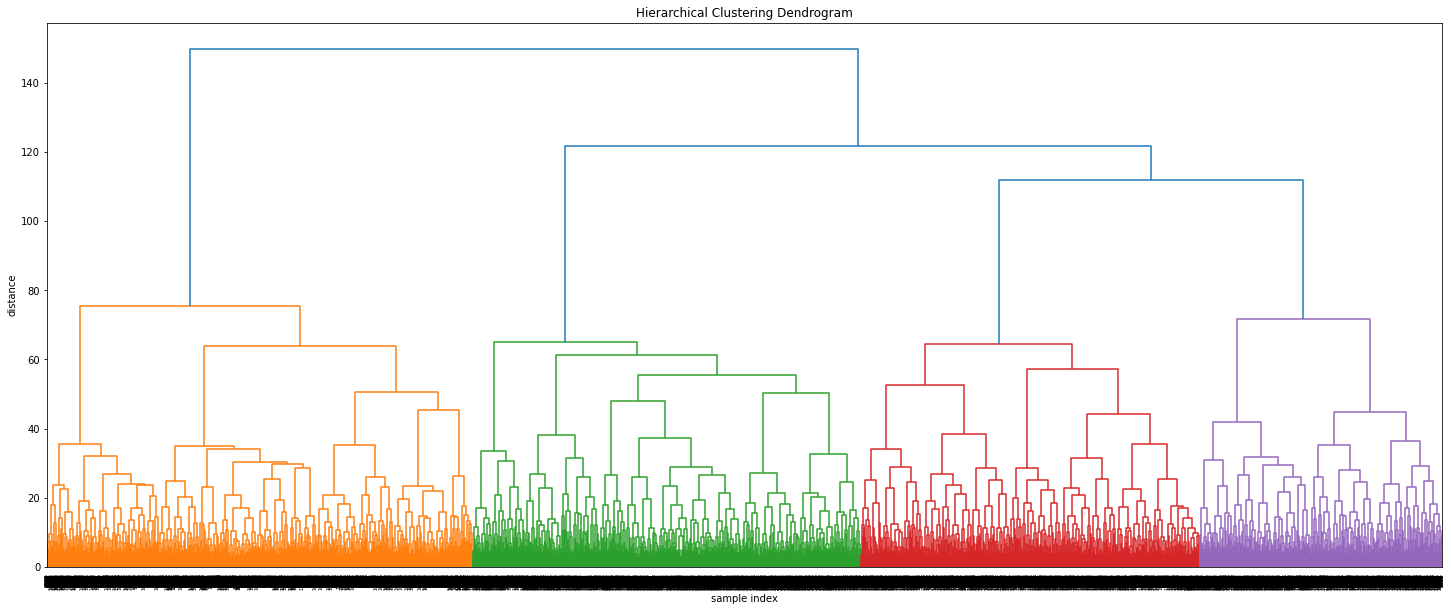

In [115]:
plt.figure(figsize = (25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
HClust = linkage(customer_churn, method = 'ward')
dend = dendrogram(HClust)

### Hierarchical Clustering (truncated)

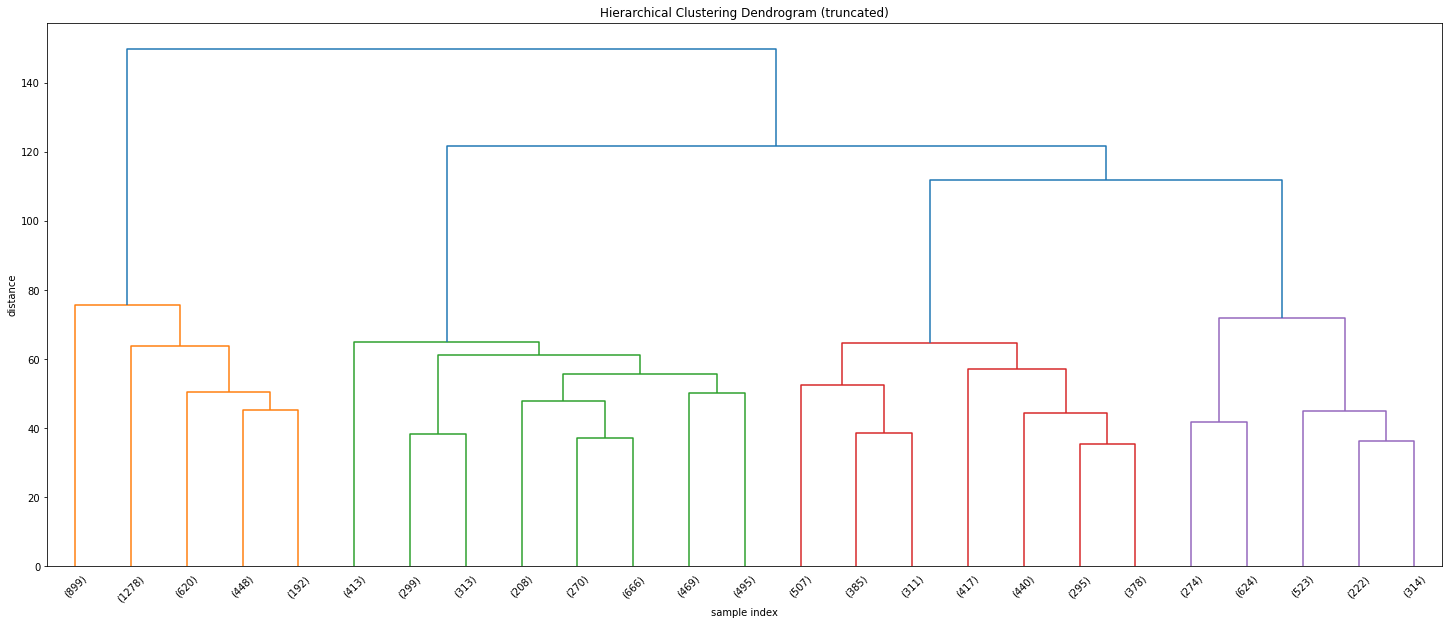

In [116]:
plt.figure(figsize = (25,10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 25,
                 )

### Hierarchical Clustering (trucated) Cut Off Value

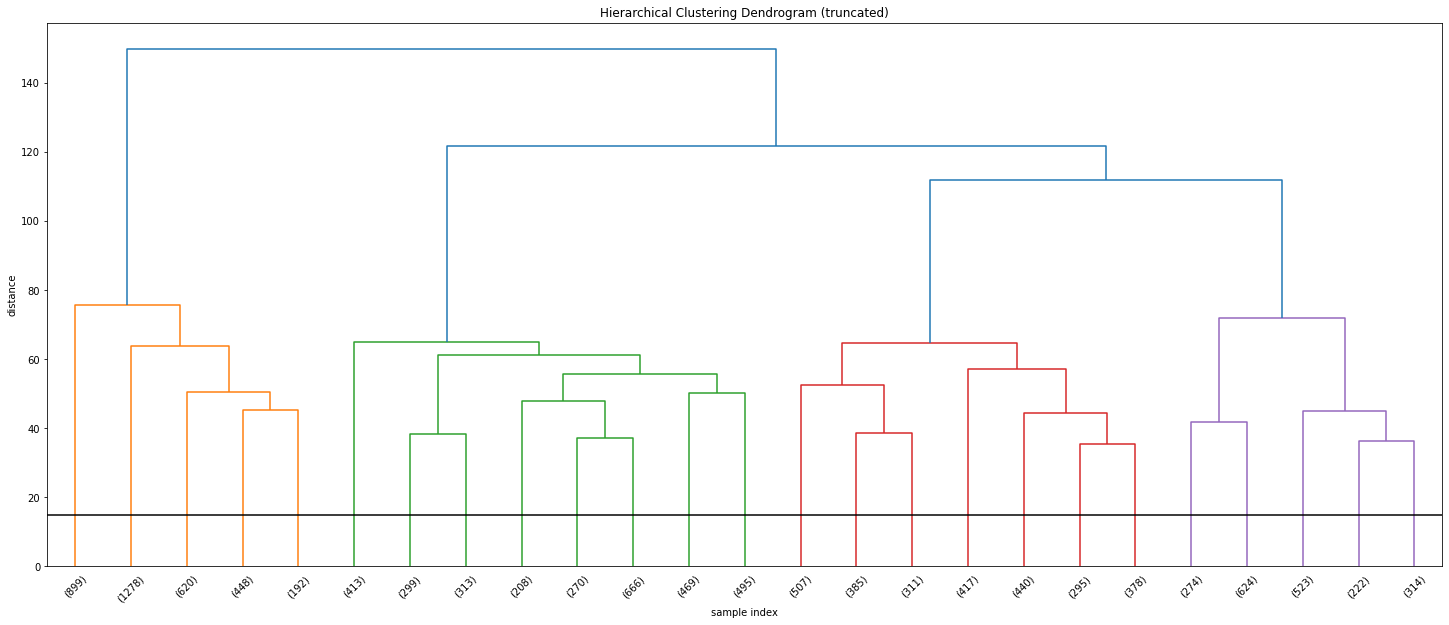

In [117]:
plt.figure(figsize = (25,10))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dend = dendrogram(HClust,
                 truncate_mode='lastp',
                 p = 25,
                 )

max_d = 15
dend = plt.axhline(y=max_d, c='k')

### Optimum Clusters

In [118]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(HClust, 3, criterion='maxclust')
clusters

array([3, 1, 1, ..., 1, 3, 1], dtype=int32)

In [119]:
customer_churn['H_clusters'] = clusters
customer_churn.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn,Clus_kmeans,H_clusters
0,-0.55,1.41,-1.34,0.20,-1.21,0.13,-0.68,0.70,-0.77,1.13,0.22,1.58,-1.38,-0.40,0.10,-0.20,0.37,1.00,1,3
1,-0.86,-0.72,-1.11,1.62,0.76,0.13,0.30,-0.17,-0.05,1.13,0.05,1.58,-0.32,-0.91,-1.25,-0.42,0.37,1.00,2,1
2,-0.86,-0.72,1.37,0.20,0.76,-1.25,0.30,-0.17,-0.05,1.13,-0.03,1.58,-0.58,-0.91,-0.44,-0.37,0.37,1.00,2,1
3,-0.86,1.41,-0.32,0.20,0.76,-1.25,0.30,0.70,1.40,1.13,0.14,-0.63,1.81,-0.91,-0.44,-0.35,0.37,1.00,1,3
4,-0.86,-0.72,-0.66,-0.75,0.76,-1.25,-0.68,-0.17,1.40,1.13,-0.28,-0.63,-1.38,-0.40,-0.44,-0.37,0.37,1.00,2,1


### Frequency of Clusters

In [120]:
customer_churn['H_clusters'].value_counts().sort_index()

1    3437
2    3133
3    4690
Name: H_clusters, dtype: int64

###  Cluster Profiling

In [121]:
aggregate_data = customer_churn.groupby('H_clusters').mean()
aggregate_data['Frequency']=customer_churn['H_clusters'].value_counts().sort_index()
aggregate_data

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,Churn,Clus_kmeans,Frequency
H_clusters,,,,,,,,,,,,,,,,,,,,
1,-0.10,-0.65,-0.13,-0.26,0.08,-0.67,-0.47,0.05,-0.04,0.05,-0.11,0.01,-0.26,-0.41,-0.36,-0.18,0.00,0.15,1.90,3437
2,-0.03,-0.56,0.11,-0.26,0.01,0.57,0.32,-0.11,0.03,0.00,-0.07,-0.52,0.33,0.01,0.27,-0.06,0.01,0.12,0.20,3133
3,-0.04,0.85,0.01,0.25,-0.06,0.10,0.14,0.18,0.01,-0.04,-0.09,0.33,-0.03,-0.09,0.07,-0.06,-0.01,0.22,0.83,4690


Cluster 1: Low Tenure Category

Cluster 2: Medium Tenure Category

Cluster 3: High Tenure Category

### Model Building - Unbalanced Data

### Logistic Regression Model

#### Model Building

In [122]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [123]:
lr_model = model.fit(X_train, y_train)
lr_model

LogisticRegression()

#### Predicting on Train and Test dataset

In [124]:
ytrain_predict = lr_model.predict(X_train)
ytest_predict = lr_model.predict(X_test)

#### Model Evaluation

##### Performance Metrics on Training Data

In [125]:
from sklearn.metrics import roc_auc_score,classification_report

probs = lr_model.predict_proba(X_train)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Training Data')

lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)


print(classification_report(y_train, ytrain_predict));

Unbalanced - Performance Metrics on Training Data
AUC: 0.872
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      6555
         1.0       0.77      0.46      0.57      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.72      0.75      7882
weighted avg       0.88      0.89      0.87      7882



##### Performance Metrics on Testing Data

In [126]:
from sklearn.metrics import roc_auc_score,classification_report

probs = lr_model.predict_proba(X_test)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Testing Data')

lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)


print(classification_report(y_test, ytest_predict));

Unbalanced - Performance Metrics on Testing Data
AUC: 0.865
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      2809
         1.0       0.81      0.48      0.60       569

    accuracy                           0.89      3378
   macro avg       0.86      0.73      0.77      3378
weighted avg       0.89      0.89      0.88      3378



### Linear Discriminant Analysis Model

#### Model Building

In [127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

In [128]:
lda_model = clf.fit(X_train,y_train)
lda_model

LinearDiscriminantAnalysis()

#### Predicting on Train and Test dataset

In [129]:
ytrain_predict = lda_model.predict(X_train)
ytest_predict = lda_model.predict(X_test)

#### Model Evaluation

##### Performance Metrics on Training Data

In [130]:
from sklearn.metrics import roc_auc_score,classification_report

probs = lda_model.predict_proba(X_train)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Training Data')

lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)

print(classification_report(y_train, ytrain_predict));

Unbalanced - Performance Metrics on Training Data
AUC: 0.860
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      6555
         1.0       0.75      0.41      0.53      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.69      0.73      7882
weighted avg       0.87      0.88      0.86      7882



##### Performance Metrics on Testing Data

In [131]:
from sklearn.metrics import roc_auc_score,classification_report

probs = lda_model.predict_proba(X_test)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Testing Data')

lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)


print(classification_report(y_test, ytest_predict));

Unbalanced - Performance Metrics on Testing Data
AUC: 0.865
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      2809
         1.0       0.78      0.41      0.54       569

    accuracy                           0.88      3378
   macro avg       0.84      0.69      0.74      3378
weighted avg       0.87      0.88      0.87      3378



### K-Nearest Neighbours Model

#### Model Building

In [132]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

#### Predicting on Train and Test dataset

In [133]:
ytrain_predict = knn_model.predict(X_train)
ytest_predict = knn_model.predict(X_test)

#### Model Evaluation

##### Performance Metrics on Training Data

In [134]:
from sklearn.metrics import roc_auc_score,classification_report

probs = knn_model.predict_proba(X_train)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Training Data')

knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)

print(classification_report(y_train, ytrain_predict));

Unbalanced - Performance Metrics on Training Data
AUC: 0.994
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      6555
         1.0       0.94      0.89      0.92      1327

    accuracy                           0.97      7882
   macro avg       0.96      0.94      0.95      7882
weighted avg       0.97      0.97      0.97      7882



##### Performance Metrics on Testing Data

In [135]:
from sklearn.metrics import roc_auc_score,classification_report

probs = knn_model.predict_proba(X_test)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Testing Data')

knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)


print(classification_report(y_test, ytest_predict));

Unbalanced - Performance Metrics on Testing Data
AUC: 0.974
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2809
         1.0       0.86      0.78      0.82       569

    accuracy                           0.94      3378
   macro avg       0.91      0.88      0.89      3378
weighted avg       0.94      0.94      0.94      3378



### Naive Bayes Model

#### Model Building

In [136]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

#### Predicting on Train and Test dataset

In [137]:
ytrain_predict = nb_model.predict(X_train)
ytest_predict = nb_model.predict(X_test)

#### Model Evaluation

##### Performance Metrics on Training Data

In [138]:
from sklearn.metrics import roc_auc_score,classification_report

probs = nb_model.predict_proba(X_train)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Training Data')

nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_train_auc)

print(classification_report(y_train, ytrain_predict));

Unbalanced - Performance Metrics on Training Data
AUC: 0.830
              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      6555
         1.0       0.61      0.57      0.59      1327

    accuracy                           0.87      7882
   macro avg       0.76      0.75      0.76      7882
weighted avg       0.86      0.87      0.87      7882



##### Performance Metrics on Testing Data

In [139]:
from sklearn.metrics import roc_auc_score,classification_report

probs = nb_model.predict_proba(X_test)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Testing Data')

nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)

print(classification_report(y_test, ytest_predict));

Unbalanced - Performance Metrics on Testing Data
AUC: 0.814
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      2809
         1.0       0.59      0.57      0.58       569

    accuracy                           0.86      3378
   macro avg       0.75      0.74      0.75      3378
weighted avg       0.86      0.86      0.86      3378



### Random Forest Classifier Model

#### Model Building

In [140]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

#### Predicting on Train and Test dataset

In [141]:
ytrain_predict = rf_model.predict(X_train)
ytest_predict = rf_model.predict(X_test)

#### Model Evaluation

##### Performance Metrics on Training Data

In [142]:
from sklearn.metrics import roc_auc_score,classification_report

probs = rf_model.predict_proba(X_train)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Training Data')

rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)

print(classification_report(y_train, ytrain_predict))

Unbalanced - Performance Metrics on Training Data
AUC: 1.000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6555
         1.0       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



##### Performance Metrics on Testing Data

In [143]:
from sklearn.metrics import roc_auc_score,classification_report

probs = rf_model.predict_proba(X_test)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Testing Data')

rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)

print(classification_report(y_test, ytest_predict))

Unbalanced - Performance Metrics on Testing Data
AUC: 0.994
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2809
         1.0       0.95      0.86      0.90       569

    accuracy                           0.97      3378
   macro avg       0.96      0.92      0.94      3378
weighted avg       0.97      0.97      0.97      3378



### Decision Tree Classifier Model

#### Model Building

In [144]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [145]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

#### Model Evaluation

##### Performance Metrics on Training Data

In [146]:
from sklearn.metrics import roc_auc_score,classification_report

probs = dt_model.predict_proba(X_train)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Training Data')

dt_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_train_auc)

print(classification_report(y_train, ytrain_predict))

Unbalanced - Performance Metrics on Training Data
AUC: 1.000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6555
         1.0       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882



##### Performance Metrics on Testing Data

In [147]:
from sklearn.metrics import roc_auc_score,classification_report

probs = dt_model.predict_proba(X_test)

probs = probs[:, 1]

print('Unbalanced - Performance Metrics on Testing Data')

dt_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_test_auc)

print(classification_report(y_test, ytest_predict))

Unbalanced - Performance Metrics on Testing Data
AUC: 0.908
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2809
         1.0       0.86      0.85      0.85       569

    accuracy                           0.95      3378
   macro avg       0.91      0.91      0.91      3378
weighted avg       0.95      0.95      0.95      3378



### Model Building - Balanced Data

### Extracting the target column into separate vectors for training set and test set

In [148]:
X = train_smote.drop('Churn', axis = 1)
y = train_smote['Churn']
X.head()

,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1.09,-0.72,-0.66,-1.70,0.76,0.13,-0.68,0.70,1.40,-0.29,-0.20,1.58,-1.12,0.11,1.18,-0.23,0.37
1,-0.47,1.41,1.60,1.14,0.76,0.13,-0.68,0.70,-1.50,-0.29,-0.45,-0.63,0.48,0.11,-0.71,-0.29,-1.47
2,-0.86,-0.72,0.81,-0.75,0.76,0.13,-0.68,-0.17,-0.77,-1.71,-0.20,-0.63,-1.38,-0.40,-0.71,-0.33,0.37
3,-0.31,1.41,-0.44,-0.75,0.76,0.13,-1.65,0.70,1.40,-0.29,0.05,-0.63,1.81,-0.40,1.18,-0.14,0.37
4,-0.62,1.41,0.24,1.62,0.76,0.13,-0.68,-1.48,-0.05,-0.29,0.22,-0.63,-1.12,0.87,0.64,-0.10,0.37


### Splitting data into training and test set

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42, stratify = y)

### Checking the dimensions of the training and test data

In [150]:
print(X_train.shape)
print(X_test.shape)

(9177, 17)
(3933, 17)


### Logistic Regression Model

#### Grid Search

In [151]:
grid={'penalty':['l1','l2','none'],
      'solver':['newton-cg','lbfgs'],
      'tol':[0.001,0.0000001]}

#### Model Building

In [152]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=100000,n_jobs=2,verbose=True,random_state=42)

In [153]:
from sklearn.model_selection import GridSearchCV

grid_search_lr = GridSearchCV(estimator = model, param_grid = grid, cv = 3, n_jobs=2, scoring='f1')

grid_search_lr.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.1s finished


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=100000, n_jobs=2,
                                          random_state=42, verbose=True),
             n_jobs=2,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs'],
                         'tol': [0.001, 1e-07]},
             scoring='f1')

In [154]:
print(grid_search_lr.best_params_,'\n')

print(grid_search_lr.best_estimator_,'\n')

print('Cross Validation Score:', grid_search_lr.best_score_)

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='none', random_state=42,
                   solver='newton-cg', tol=0.001, verbose=True) 

Cross Validation Score: 0.809097301850552


In [155]:
lr_model = grid_search_lr.best_estimator_
lr_model

LogisticRegression(max_iter=100000, n_jobs=2, penalty='none', random_state=42,
                   solver='newton-cg', tol=0.001, verbose=True)

#### Predicting on Train and Test dataset

In [156]:
ytrain_predict = lr_model.predict(X_train)
ytest_predict = lr_model.predict(X_test)

#### Model Evaluation

##### Accuracy for the Training Data

In [157]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

lr_train_accuracy = lr_model.score(X_train, y_train)
lr_train_accuracy

0.8056009589190367

##### AUC and ROC for the Training Data

AUC: 0.883


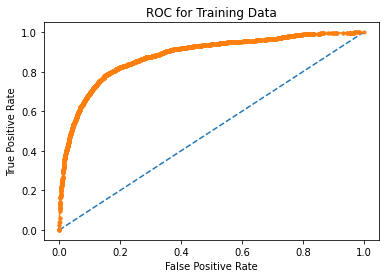

In [158]:
probs = lr_model.predict_proba(X_train)

probs = probs[:, 1]

# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)

# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training Data')
plt.show()

##### Confusion Matrix for the Training Data

In [159]:
confusion_matrix(y_train, ytrain_predict)

array([[3571, 1017],
       [ 767, 3822]], dtype=int64)

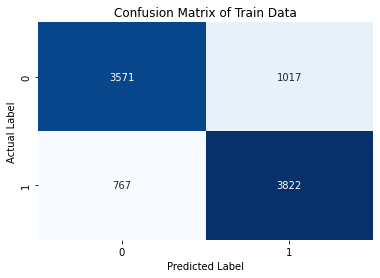

In [160]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data')
plt.show()

##### Classification Report for the Training Data

In [161]:
print('Balanced - Performance Metrics on Training Data')

print('AUC: %.3f' % lr_train_auc)

print(classification_report(y_train, ytrain_predict));

Balanced - Performance Metrics on Training Data
AUC: 0.883
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80      4588
         1.0       0.79      0.83      0.81      4589

    accuracy                           0.81      9177
   macro avg       0.81      0.81      0.81      9177
weighted avg       0.81      0.81      0.81      9177



In [162]:
lr_metrics = classification_report(y_train, ytrain_predict, output_dict=True)
df = pd.DataFrame(lr_metrics).transpose()
lr_train_precision = round(df.loc["1.0"][0], 2)
lr_train_recall = round(df.loc["1.0"][1], 2)
lr_train_f1 = round(df.loc["1.0"][2], 2)
print ('lr_train_recall ', lr_train_recall)
print ('lr_train_precision ', lr_train_precision)
print ('lr_train_f1 ', lr_train_f1)

lr_train_recall  0.83
lr_train_precision  0.79
lr_train_f1  0.81


##### Accuracy for the Testing Data

In [163]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

lr_test_accuracy = lr_model.score(X_test, y_test)
lr_test_accuracy

0.8085430968726163

##### AUC and ROC for the Testing Data

AUC: 0.878


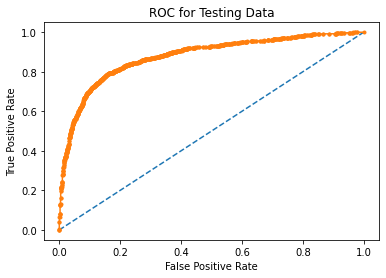

In [164]:
probs = lr_model.predict_proba(X_test)

probs = probs[:, 1]

# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)

# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing Data')
plt.show()

##### Confusion Matrix for the Testing Data

In [165]:
confusion_matrix(y_test, ytest_predict)

array([[1571,  396],
       [ 357, 1609]], dtype=int64)

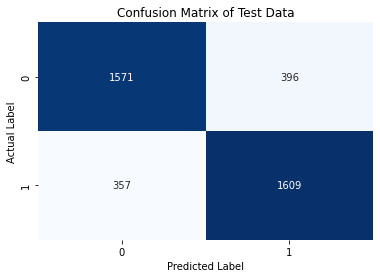

In [166]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data')
plt.show()

##### Classification Report for the Testing Data

In [167]:
print('Balanced - Performance Metrics on Testing Data')

print('AUC: %.3f' % lr_test_auc)

print(classification_report(y_test, ytest_predict))

Balanced - Performance Metrics on Testing Data
AUC: 0.878
              precision    recall  f1-score   support

         0.0       0.81      0.80      0.81      1967
         1.0       0.80      0.82      0.81      1966

    accuracy                           0.81      3933
   macro avg       0.81      0.81      0.81      3933
weighted avg       0.81      0.81      0.81      3933



In [168]:
lr_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(lr_metrics).transpose()
lr_test_recall = round(df.loc["1.0"][1], 2)
lr_test_precision = round(df.loc["1.0"][0], 2)
lr_test_f1 = round(df.loc["1.0"][2], 2)
print ('lr_test_recall ', lr_test_recall)
print ('lr_test_precision ', lr_test_precision)
print ('lr_test_f1 ', lr_test_f1)

lr_test_recall  0.82
lr_test_precision  0.8
lr_test_f1  0.81


##### Combining the Train and Test Data

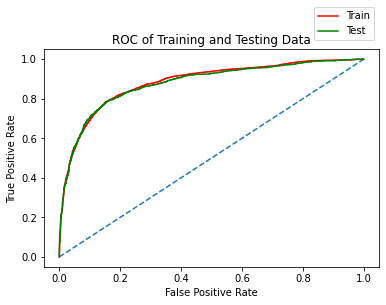

In [169]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr, color='red', label="Train")
plt.plot(lr_test_fpr, lr_test_tpr, color='green', label="Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Training and Testing Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Linear Discriminant Analysis Model

#### Model Building

In [170]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver='svd')

In [171]:
lda_model=clf.fit(X_train,y_train)
lda_model

LinearDiscriminantAnalysis()

In [172]:
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold

X, y = make_classification(n_samples=1000, n_features=10, n_informative=10, n_redundant=0, random_state=42)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']

search = GridSearchCV(lda_model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

results = search.fit(X, y)

print('Cross Validation Score:', results.best_score_)

Cross Validation Score: 0.8439999999999999


#### Predicting on Train and Test dataset

In [173]:
ytrain_predict = lda_model.predict(X_train)
ytest_predict = lda_model.predict(X_test)

#### Model Evaluation

##### Accuracy for the Training Data

In [174]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

lda_train_accuracy = lda_model.score(X_train, y_train)
lda_train_accuracy

0.7975373215647815

##### AUC and ROC for the Training Data

AUC: 0.883


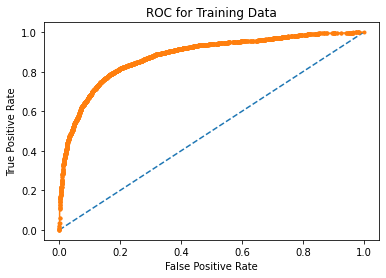

In [175]:
probs = lda_model.predict_proba(X_train)

probs = probs[:, 1]

# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)

# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_train_fpr, lda_train_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training Data')
plt.show()

##### Confusion Matrix for the Training Data

In [176]:
confusion_matrix(y_train, ytrain_predict)

array([[3440, 1148],
       [ 710, 3879]], dtype=int64)

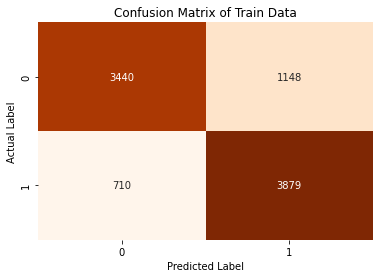

In [177]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data')
plt.show()

##### Classification Report for the Training Data

In [178]:
print('Balanced - Performance Metrics on Training Data')

print('AUC: %.3f' % lda_train_auc)

print(classification_report(y_train, ytrain_predict));

Balanced - Performance Metrics on Training Data
AUC: 0.880
              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79      4588
         1.0       0.77      0.85      0.81      4589

    accuracy                           0.80      9177
   macro avg       0.80      0.80      0.80      9177
weighted avg       0.80      0.80      0.80      9177



In [179]:
lda_metrics = classification_report(y_train, ytrain_predict, output_dict=True)
df = pd.DataFrame(lda_metrics).transpose()
lda_train_recall = round(df.loc["1.0"][1], 2)
lda_train_precision = round(df.loc["1.0"][0], 2)
lda_train_f1 = round(df.loc["1.0"][2], 2)
print ('lda_train_recall ', lda_train_recall)
print ('lda_train_precision ', lda_train_precision)
print ('lda_train_f1 ', lda_train_f1)

lda_train_recall  0.85
lda_train_precision  0.77
lda_train_f1  0.81


##### Accuracy for the Testing Data

In [180]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

lda_test_accuracy = lda_model.score(X_test, y_test)
lda_test_accuracy

0.8009153318077803

##### AUC and ROC for the Testing Data

AUC: 0.878


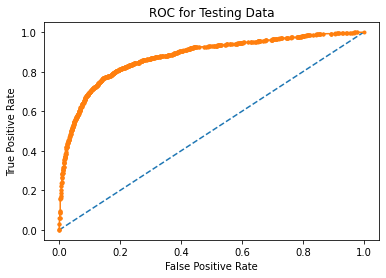

In [181]:
probs = lda_model.predict_proba(X_test)

probs = probs[:, 1]

# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)

# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_test_thresholds = roc_curve(y_test, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_test_fpr, lda_test_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing Data')
plt.show()

##### Confusion Matrix for the Testing Data

In [182]:
confusion_matrix(y_test, ytest_predict)

array([[1511,  456],
       [ 327, 1639]], dtype=int64)

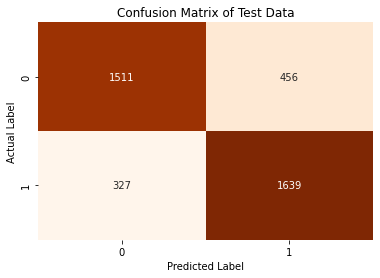

In [183]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data')
plt.show()

##### Classification Report for the Testing Data

In [184]:
print('Balanced - Performance Metrics on Testing Data')

print('AUC: %.3f' % lda_test_auc)

print(classification_report(y_test, ytest_predict))

Balanced - Performance Metrics on Testing Data
AUC: 0.877
              precision    recall  f1-score   support

         0.0       0.82      0.77      0.79      1967
         1.0       0.78      0.83      0.81      1966

    accuracy                           0.80      3933
   macro avg       0.80      0.80      0.80      3933
weighted avg       0.80      0.80      0.80      3933



In [185]:
lda_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(lda_metrics).transpose()
lda_test_recall = round(df.loc["1.0"][1], 2)
lda_test_precision = round(df.loc["1.0"][0], 2)
lda_test_f1 = round(df.loc["1.0"][2], 2)
print ('lda_test_recall ', lda_test_recall)
print ('lda_test_precision ', lda_test_precision)
print ('lda_test_f1 ', lda_test_f1)

lda_test_recall  0.83
lda_test_precision  0.78
lda_test_f1  0.81


##### Combining the Train and Test Data

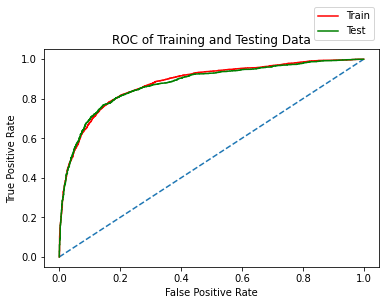

In [186]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lda_train_fpr, lda_train_tpr, color='red', label="Train")
plt.plot(lda_test_fpr, lda_test_tpr, color='green', label="Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Training and Testing Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### K-Nearest Neighbours Model

#### Model Building

In [187]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=2,metric='minkowski',p=2)
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [188]:
k_range = list(range(1, 15))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=True)

grid_search_knn = grid.fit(X_train,y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


In [189]:
print(grid_search_knn.best_params_,'\n')

print('Cross Validation Score:', grid_search_knn.best_score_)

{'n_neighbors': 2} 

Cross Validation Score: 0.9773346828129046


#### Predicting on Train and Test dataset

In [190]:
ytrain_predict = knn_model.predict(X_train)
ytest_predict = knn_model.predict(X_test)

#### Model Evaluation

##### Accuracy for the Training Data

In [191]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

knn_train_accuracy = knn_model.score(X_train,y_train)
knn_train_accuracy

0.9993461915658712

##### AUC and ROC for the Training Data

AUC: 1.000


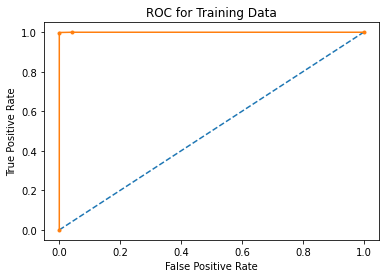

In [192]:
probs = knn_model.predict_proba(X_train)

probs = probs[:, 1]

# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)

# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_train_fpr, knn_train_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training Data')
plt.show()

##### Confusion Matrix for the Training Data

In [193]:
confusion_matrix(y_train, ytrain_predict)

array([[4588,    0],
       [   6, 4583]], dtype=int64)

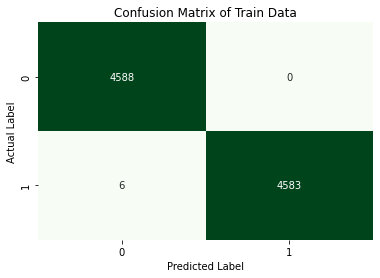

In [194]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data')
plt.show()

##### Classification Report for the Training Data

In [195]:
print('Balanced - Performance Metrics on Training Data')

print('AUC: %.3f' % knn_train_auc)

print(classification_report(y_train, ytrain_predict));

Balanced - Performance Metrics on Training Data
AUC: 1.000
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4588
         1.0       1.00      1.00      1.00      4589

    accuracy                           1.00      9177
   macro avg       1.00      1.00      1.00      9177
weighted avg       1.00      1.00      1.00      9177



In [196]:
knn_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(knn_metrics).transpose()
knn_train_recall = round(df.loc["1.0"][1], 2)
knn_train_precision = round(df.loc["1.0"][0], 2)
knn_train_f1 = round(df.loc["1.0"][2], 2)
print ('knn_train_recall ', knn_train_recall)
print ('knn_train_precision ', knn_train_precision)
print ('knn_train_f1 ', knn_train_f1)

knn_train_recall  0.99
knn_train_precision  0.97
knn_train_f1  0.98


##### Accuracy for the Testing Data

In [197]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

knn_test_accuracy = knn_model.score(X_test, y_test)
knn_test_accuracy

0.9801678108314263

##### AUC and ROC for the Testing Data

AUC: 0.982


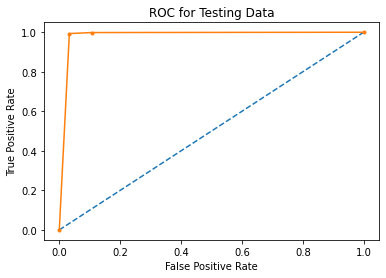

In [198]:
probs = knn_model.predict_proba(X_test)

probs = probs[:, 1]

# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)

# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_test_fpr, knn_test_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing Data')
plt.show()

##### Confusion Matrix for the Testing Data

In [199]:
confusion_matrix(y_test, ytest_predict)

array([[1902,   65],
       [  13, 1953]], dtype=int64)

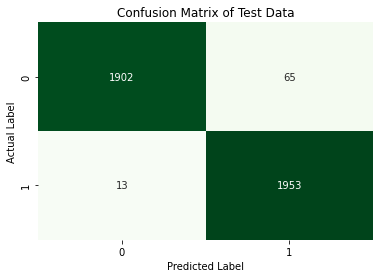

In [200]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data')
plt.show()

##### Classification Report for the Testing Data

In [201]:
print('Balanced - Performance Metrics on Testing Data')

print('AUC: %.3f' % knn_test_auc)

print(classification_report(y_test, ytest_predict))

Balanced - Performance Metrics on Testing Data
AUC: 0.982
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1967
         1.0       0.97      0.99      0.98      1966

    accuracy                           0.98      3933
   macro avg       0.98      0.98      0.98      3933
weighted avg       0.98      0.98      0.98      3933



In [202]:
knn_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(knn_metrics).transpose()
knn_test_recall = round(df.loc["1.0"][1], 2)
knn_test_precision = round(df.loc["1.0"][0], 2)
knn_test_f1 = round(df.loc["1.0"][2], 2)
print ('knn_test_recall ', knn_test_recall)
print ('knn_test_precision ', knn_test_precision)
print ('knn_test_f1 ', knn_test_f1)

knn_test_recall  0.99
knn_test_precision  0.97
knn_test_f1  0.98


##### Combining the Train and Test Data

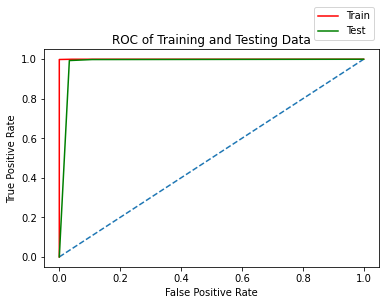

In [203]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(knn_train_fpr, knn_train_tpr, color='red', label="Train")
plt.plot(knn_test_fpr, knn_test_tpr, color='green', label="Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Training and Testing Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Naive Bayes Model

#### Model Building

In [204]:
from sklearn.naive_bayes import GaussianNB

nb_model=GaussianNB(var_smoothing=0.0533669923120631)
nb_model.fit(X_train, y_train)

GaussianNB(var_smoothing=0.0533669923120631)

In [205]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, verbose=True, cv=10, n_jobs=-1)
grid_search_nb.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(var_smoothing=0.0533669923120631),
             n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.3287...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=True)

In [206]:
print(grid_search_nb.best_params_,'\n')

print(grid_search_nb.best_estimator_,'\n')

print('Cross Validation Score:', grid_search_nb.best_score_)

{'var_smoothing': 0.0533669923120631} 

GaussianNB(var_smoothing=0.0533669923120631) 

Cross Validation Score: 0.7537282936923709


#### Predicting on Train and Test dataset

In [207]:
ytrain_predict = nb_model.predict(X_train)
ytest_predict = nb_model.predict(X_test)

#### Model Evaluation

##### Accuracy for the Training Data

In [208]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

nb_train_accuracy = nb_model.score(X_train,y_train)
nb_train_accuracy

0.7532962841887327

##### AUC and ROC for the Training Data

AUC: 0.849


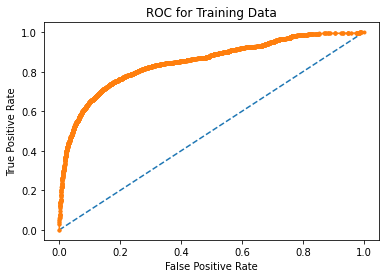

In [209]:
probs = nb_model.predict_proba(X_train)

probs = probs[:, 1]

# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_train_auc)

# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_train_fpr, nb_train_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training Data')
plt.show()

##### Confusion Matrix for the Training Data

In [210]:
confusion_matrix(y_train, ytrain_predict)

array([[3078, 1510],
       [ 754, 3835]], dtype=int64)

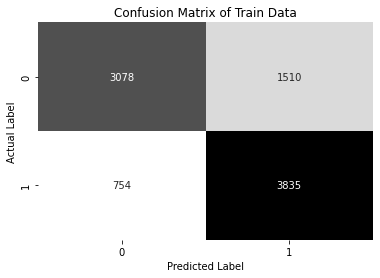

In [211]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='Greys')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data')
plt.show()

##### Classification Report for the Training Data

In [212]:
print('Balanced - Performance Metrics on Training Data')

print('AUC: %.3f' % nb_train_auc)

print(classification_report(y_train, ytrain_predict));

Balanced - Performance Metrics on Training Data
AUC: 0.849
              precision    recall  f1-score   support

         0.0       0.80      0.67      0.73      4588
         1.0       0.72      0.84      0.77      4589

    accuracy                           0.75      9177
   macro avg       0.76      0.75      0.75      9177
weighted avg       0.76      0.75      0.75      9177



In [213]:
nb_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(nb_metrics).transpose()
nb_train_recall = round(df.loc["1.0"][1], 2)
nb_train_precision = round(df.loc["1.0"][0], 2)
nb_train_f1 = round(df.loc["1.0"][2], 2)
print ('nb_train_recall ', nb_train_recall)
print ('nb_train_precision ', nb_train_precision)
print ('nb_train_f1 ', nb_train_f1)

nb_train_recall  0.84
nb_train_precision  0.72
nb_train_f1  0.77


##### Accuracy for the Testing Data

In [214]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

nb_test_accuracy = nb_model.score(X_test, y_test)
nb_test_accuracy

0.7561657767607425

##### AUC and ROC for the Testing Data

AUC: 0.846


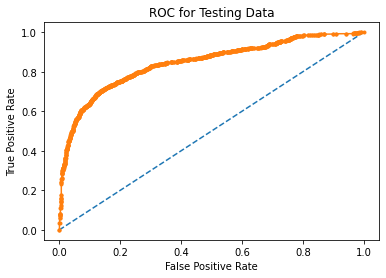

In [215]:
probs = nb_model.predict_proba(X_test)

probs = probs[:, 1]

# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)

# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_test_fpr, nb_test_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing Data')
plt.show()

##### Confusion Matrix for the Testing Data

In [216]:
confusion_matrix(y_test, ytest_predict)

array([[1331,  636],
       [ 323, 1643]], dtype=int64)

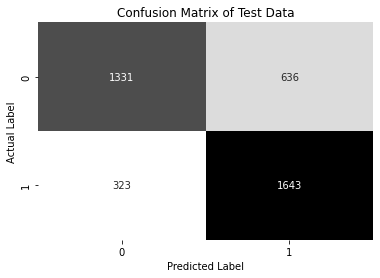

In [217]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='Greys')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data')
plt.show()

##### Classification Report for the Testing Data

In [218]:
print('Balanced - Performance Metrics on Testing Data')

print('AUC: %.3f' % nb_test_auc)

print(classification_report(y_test, ytest_predict))

Balanced - Performance Metrics on Testing Data
AUC: 0.846
              precision    recall  f1-score   support

         0.0       0.80      0.68      0.74      1967
         1.0       0.72      0.84      0.77      1966

    accuracy                           0.76      3933
   macro avg       0.76      0.76      0.75      3933
weighted avg       0.76      0.76      0.75      3933



In [219]:
nb_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(nb_metrics).transpose()
nb_test_recall = round(df.loc["1.0"][1], 2)
nb_test_precision = round(df.loc["1.0"][0], 2)
nb_test_f1 = round(df.loc["1.0"][2], 2)
print ('nb_test_recall ', nb_test_recall)
print ('nb_test_precision ', nb_test_precision)
print ('nb_test_f1 ', nb_test_f1)

nb_test_recall  0.84
nb_test_precision  0.72
nb_test_f1  0.77


##### Combining the Train and Test Data

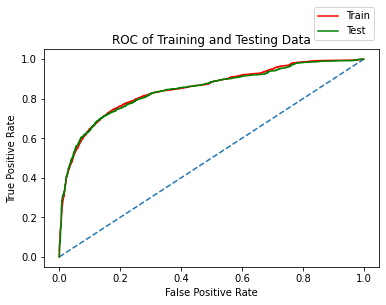

In [220]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(nb_train_fpr, nb_train_tpr, color='red', label="Train")
plt.plot(nb_test_fpr, nb_test_tpr, color='green', label="Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Training and Testing Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Random Forest Classifier Model

#### Model Building

In [221]:
from sklearn.ensemble import RandomForestClassifier

rfcl = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
rfcl.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

#### Feature Importance

In [222]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                         Imp
Tenure                  0.26
City_Tier               0.03
CC_Contacted_LY         0.06
Payment                 0.04
Gender                  0.02
Service_Score           0.03
Account_user_count      0.05
account_segment         0.05
CC_Agent_Score          0.05
Marital_Status          0.04
rev_per_month           0.06
Complain_ly             0.06
rev_growth_yoy          0.06
coupon_used_for_payment 0.03
Day_Since_CC_connect    0.07
cashback                0.07
Login_device            0.02


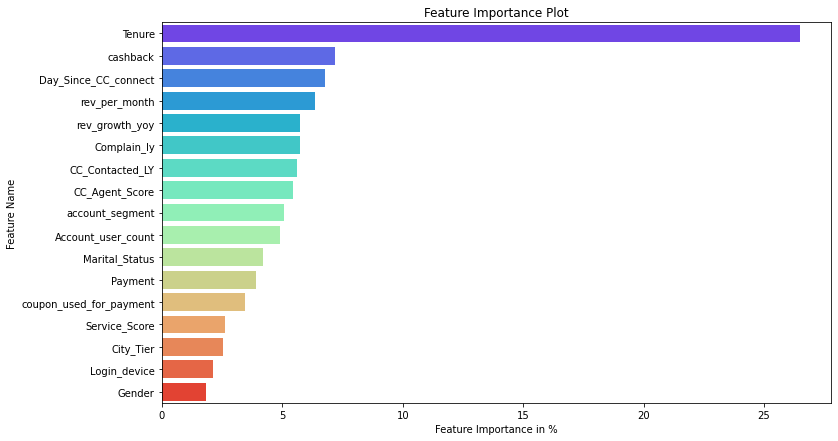

In [223]:
x=pd.DataFrame(rfcl.feature_importances_*100, index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

Tenure plays an important part in deciding whether the customer has churned or not.(Highest feature importance)

#### Optimal Values for Ensemble RandomForest Tree - Grid Search

In [224]:
param_grid_rfcl = {
    'max_depth': [13],
    'min_samples_leaf': [32],
    'min_samples_split': [150], 
    'n_estimators': [250] 
}

rfcl = RandomForestClassifier(random_state=42)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 10)

In [225]:
grid_search_rfcl.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [13], 'min_samples_leaf': [32],
                         'min_samples_split': [150], 'n_estimators': [250]})

In [226]:
print(grid_search_rfcl.best_params_,'\n')

print(grid_search_rfcl.best_estimator_,'\n')

print('Cross Validation Score:', grid_search_rfcl.best_score_)

{'max_depth': 13, 'min_samples_leaf': 32, 'min_samples_split': 150, 'n_estimators': 250} 

RandomForestClassifier(max_depth=13, min_samples_leaf=32, min_samples_split=150,
                       n_estimators=250, random_state=42) 

Cross Validation Score: 0.8657492343841693


In [227]:
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

RandomForestClassifier(max_depth=13, min_samples_leaf=32, min_samples_split=150,
                       n_estimators=250, random_state=42)

#### Regularising the Random Forest

In [228]:
reg_rf_model = RandomForestClassifier(max_depth=13, min_samples_leaf=32, min_samples_split=150, n_estimators=250, random_state = 1)
reg_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=32, min_samples_split=150,
                       n_estimators=250, random_state=1)

#### Feature Importance

In [229]:
print (pd.DataFrame(reg_rf_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                         Imp
Tenure                  0.48
City_Tier               0.02
CC_Contacted_LY         0.01
Payment                 0.01
Gender                  0.01
Service_Score           0.01
Account_user_count      0.04
account_segment         0.07
CC_Agent_Score          0.03
Marital_Status          0.04
rev_per_month           0.04
Complain_ly             0.10
rev_growth_yoy          0.02
coupon_used_for_payment 0.02
Day_Since_CC_connect    0.06
cashback                0.04
Login_device            0.01


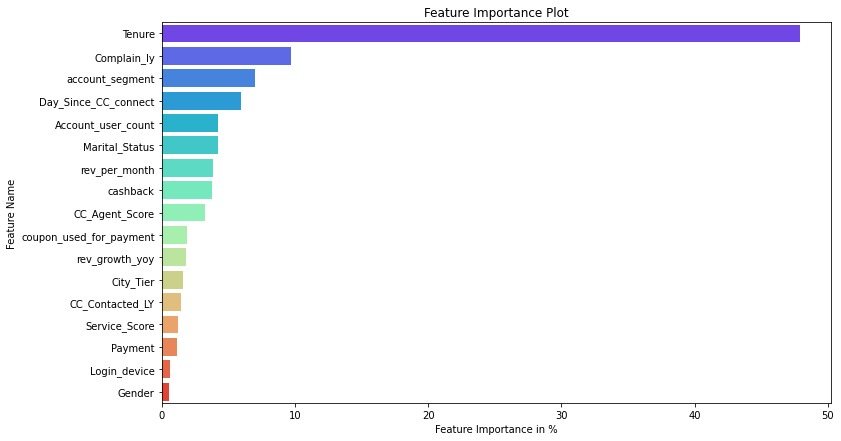

In [230]:
x=pd.DataFrame(reg_rf_model.feature_importances_*100, index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

#### Predicting on Train and Test dataset

In [231]:
ytrain_predict = best_grid_rfcl.predict(X_train)
ytest_predict = best_grid_rfcl.predict(X_test)

#### Model Evaluation

##### Accuracy for the Training Data

In [232]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

rf_train_accuracy = reg_rf_model.score(X_test, y_test)
rf_train_accuracy

0.8708365115687771

##### AUC and ROC for the Training Data

AUC: 0.962


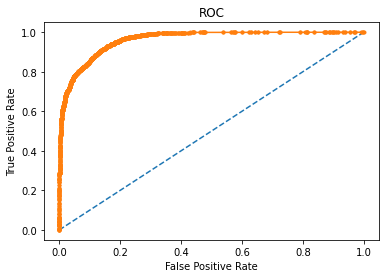

In [233]:
probs = reg_rf_model.predict_proba(X_train)

probs = probs[:, 1]

# calculate auc curve
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)

# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(y_train, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_train_fpr, rf_train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

##### Confusion Matrix for the Training Data

In [234]:
confusion_matrix(y_train, ytrain_predict)

array([[4077,  511],
       [ 601, 3988]], dtype=int64)

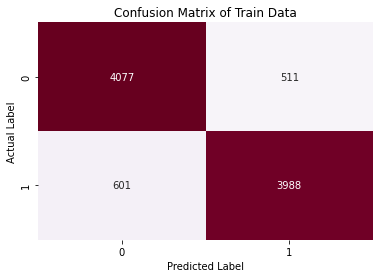

In [235]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='PuRd')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data')
plt.show()

##### Classification Report for the Training Data

In [236]:
print('Balanced - Performance Metrics on Training Data')

print('AUC: %.3f' % rf_train_auc)

print(classification_report(y_train, ytrain_predict))

Balanced - Performance Metrics on Training Data
AUC: 0.962
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      4588
         1.0       0.89      0.87      0.88      4589

    accuracy                           0.88      9177
   macro avg       0.88      0.88      0.88      9177
weighted avg       0.88      0.88      0.88      9177



In [237]:
rf_metrics = classification_report(y_train, ytrain_predict, output_dict=True)
df = pd.DataFrame(rf_metrics).transpose()
rf_train_recall = round(df.loc["1.0"][1], 2)
rf_train_precision = round(df.loc["1.0"][0], 2)
rf_train_f1 = round(df.loc["1.0"][2], 2)
print ('rf_train_recall ', rf_train_recall)
print ('rf_train_precision ', rf_train_precision)
print ('rf_train_f1 ', rf_train_f1)

rf_train_recall  0.87
rf_train_precision  0.89
rf_train_f1  0.88


##### Accuracy for the Testing Data

In [238]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

rf_test_accuracy = reg_rf_model.score(X_test, y_test)
rf_test_accuracy

0.8708365115687771

##### AUC and ROC for the Testing Data

AUC: 0.955


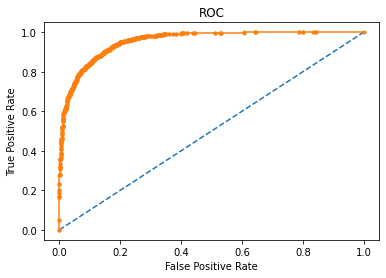

In [239]:
probs = reg_rf_model.predict_proba(X_test)

probs = probs[:, 1]

# calculate AUC

rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)

# calculate roc curve
rf_test_fpr, rf_test_tpr, thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_test_fpr, rf_test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

##### Confusion Matrix for the Testing Data

In [240]:
confusion_matrix(y_test, ytest_predict)

array([[1764,  203],
       [ 304, 1662]], dtype=int64)

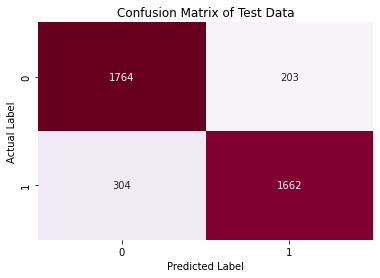

In [241]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='PuRd')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data')
plt.show()

##### Classification Report for the Testing Data

In [242]:
print('Balanced - Performance Metrics on Testing Data')

print('AUC: %.3f' % rf_test_auc)

print(classification_report(y_test, ytest_predict))

Balanced - Performance Metrics on Testing Data
AUC: 0.955
              precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1967
         1.0       0.89      0.85      0.87      1966

    accuracy                           0.87      3933
   macro avg       0.87      0.87      0.87      3933
weighted avg       0.87      0.87      0.87      3933



In [243]:
rf_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(rf_metrics).transpose()
rf_test_recall = round(df.loc["1.0"][1], 2)
rf_test_precision = round(df.loc["1.0"][0], 2)
rf_test_f1 = round(df.loc["1.0"][2], 2)
print ('rf_test_recall ', rf_test_recall)
print ('rf_test_precision ', rf_test_precision)
print ('rf_test_f1 ', rf_test_f1)

rf_test_recall  0.85
rf_test_precision  0.89
rf_test_f1  0.87


##### Combining the Train and Test Data

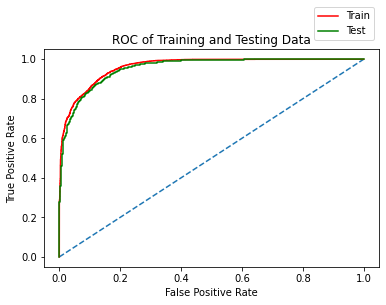

In [244]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(rf_train_fpr, rf_train_tpr, color='red', label="Train")
plt.plot(rf_test_fpr, rf_test_tpr, color='green', label="Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Training and Testing Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Decision Tree Classifier Model

#### Model Building

In [245]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#### Generating a Tree

In [246]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Churn_Tree_File = open('churn_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file = Churn_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Churn_Tree_File.close()

#### Feature Importance

In [247]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                         Imp
Tenure                  0.41
rev_per_month           0.07
rev_growth_yoy          0.05
Day_Since_CC_connect    0.05
CC_Agent_Score          0.05
Complain_ly             0.05
Account_user_count      0.04
Payment                 0.04
cashback                0.04
Marital_Status          0.03
CC_Contacted_LY         0.03
City_Tier               0.03
account_segment         0.02
Login_device            0.02
coupon_used_for_payment 0.02
Service_Score           0.02
Gender                  0.01


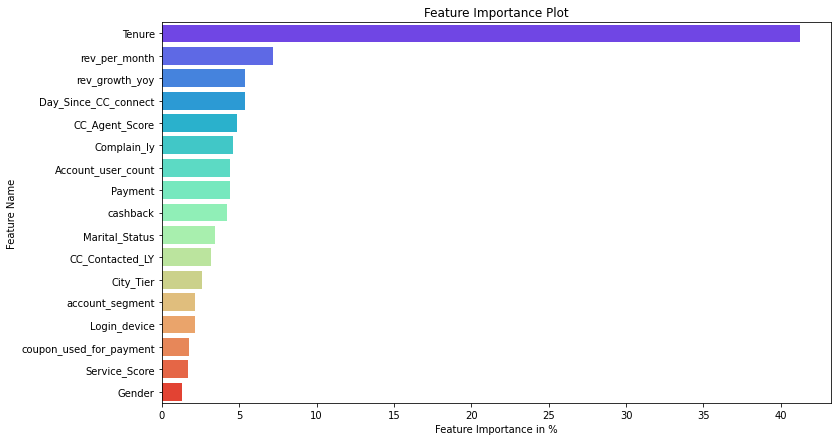

In [248]:
x=pd.DataFrame(dt_model.feature_importances_*100, index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

Tenure plays an important part in deciding whether the customer has made the claim or not.(Highest feature importance)

#### Optimal Values for Decision Tree - Grid Search

In [249]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [20,40,60,80],
    'min_samples_leaf': [100,150,200], 
    'min_samples_split': [300,450,600],
}

dtcl = DecisionTreeClassifier(random_state=42)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [250]:
grid_search_dtcl.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini'], 'max_depth': [20, 40, 60, 80],
                         'min_samples_leaf': [100, 150, 200],
                         'min_samples_split': [300, 450, 600]})

In [251]:
print(grid_search_dtcl.best_params_,'\n')

print(grid_search_dtcl.best_estimator_,'\n')

print('Cross Validation Score:', grid_search_dtcl.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 100, 'min_samples_split': 300} 

DecisionTreeClassifier(max_depth=20, min_samples_leaf=100,
                       min_samples_split=300, random_state=42) 

Cross Validation Score: 0.826735851253139


In [252]:
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

DecisionTreeClassifier(max_depth=20, min_samples_leaf=100,
                       min_samples_split=300, random_state=42)

#### Regularising the Decision Tree

In [253]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth=20, min_samples_leaf=100, min_samples_split=300, random_state=42)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=100,
                       min_samples_split=300, random_state=42)

#### Generating a New Tree

In [254]:
churn_tree_regularized = open('churn_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= churn_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

churn_tree_regularized.close()

#### Feature Importance

In [255]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                         Imp
Tenure                  0.68
City_Tier               0.01
CC_Contacted_LY         0.00
Payment                 0.00
Gender                  0.00
Service_Score           0.00
Account_user_count      0.06
account_segment         0.02
CC_Agent_Score          0.02
Marital_Status          0.01
rev_per_month           0.07
Complain_ly             0.07
rev_growth_yoy          0.02
coupon_used_for_payment 0.00
Day_Since_CC_connect    0.01
cashback                0.02
Login_device            0.01


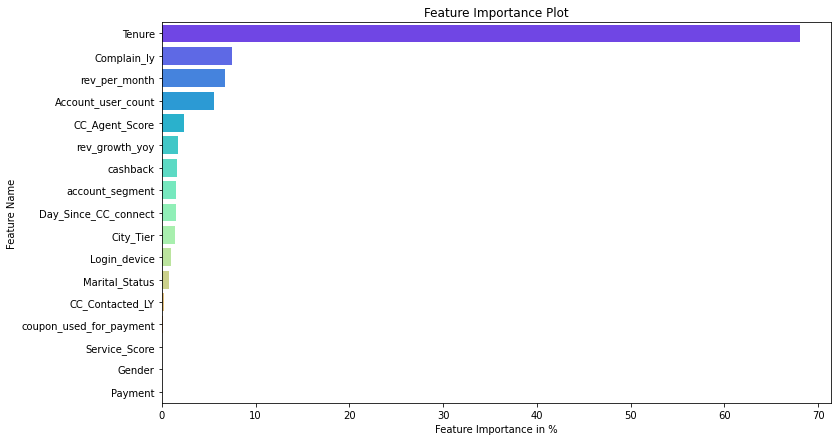

In [256]:
x=pd.DataFrame(reg_dt_model.feature_importances_*100, index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot')
plt.show()

#### Predicting on Train and Test dataset

In [257]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

#### Model Evaluation

##### Accuracy for the Training Data

In [258]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

dt_train_accuracy = reg_dt_model.score(X_test, y_test)
dt_train_accuracy

0.8362573099415205

##### AUC and ROC for the Training Data

AUC: 0.921


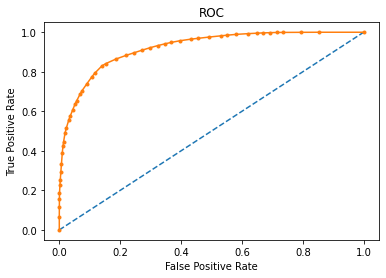

In [259]:
probs = reg_dt_model.predict_proba(X_train)

probs = probs[:, 1]

# calculate auc curve
dt_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % dt_train_auc)

# calculate roc curve
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_train_fpr, dt_train_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

##### Confusion Matrix for the Training Data

In [260]:
confusion_matrix(y_train, ytrain_predict)

array([[3943,  645],
       [ 778, 3811]], dtype=int64)

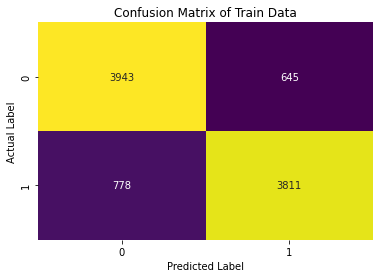

In [261]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data')
plt.show()

##### Classification Report for the Training Data

In [262]:
print('Balanced - Performance Metrics on Training Data')

print('AUC: %.3f' % dt_train_auc)

print(classification_report(y_train, ytrain_predict))

Balanced - Performance Metrics on Training Data
AUC: 0.921
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      4588
         1.0       0.86      0.83      0.84      4589

    accuracy                           0.84      9177
   macro avg       0.85      0.84      0.84      9177
weighted avg       0.85      0.84      0.84      9177



In [263]:
dt_metrics = classification_report(y_train, ytrain_predict, output_dict=True)
df = pd.DataFrame(dt_metrics).transpose()
dt_train_recall = round(df.loc["1.0"][1], 2)
dt_train_precision = round(df.loc["1.0"][0], 2)
dt_train_f1 = round(df.loc["1.0"][2], 2)
print ('dt_train_recall ', dt_train_recall)
print ('dt_train_precision ', dt_train_precision)
print ('dt_train_f1 ', dt_train_f1)

dt_train_recall  0.83
dt_train_precision  0.86
dt_train_f1  0.84


##### Accuracy for the Testing Data

In [264]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

dt_test_accuracy = reg_dt_model.score(X_test, y_test)
dt_test_accuracy

0.8362573099415205

##### AUC and ROC for the Testing Data

AUC: 0.914


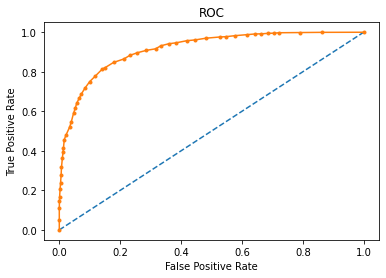

In [265]:
probs = reg_dt_model.predict_proba(X_test)

probs = probs[:, 1]

# calculate AUC

dt_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % dt_test_auc)

# calculate roc curve
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(y_test, probs)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_test_fpr, dt_test_tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

##### Confusion Matrix for the Testing Data

In [266]:
confusion_matrix(y_test, ytest_predict)

array([[1689,  278],
       [ 366, 1600]], dtype=int64)

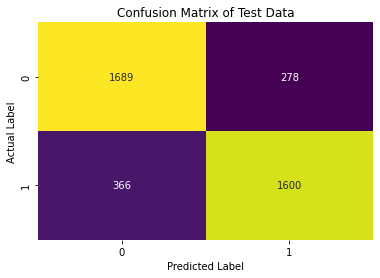

In [267]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data')
plt.show()

##### Classification Report for the Testing Data

In [268]:
print('Balanced - Performance Metrics on Testing Data')

print('AUC: %.3f' % dt_test_auc)

print(classification_report(y_test, ytest_predict))

Balanced - Performance Metrics on Testing Data
AUC: 0.914
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      1967
         1.0       0.85      0.81      0.83      1966

    accuracy                           0.84      3933
   macro avg       0.84      0.84      0.84      3933
weighted avg       0.84      0.84      0.84      3933



In [269]:
dt_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(dt_metrics).transpose()
dt_test_recall = round(df.loc["1.0"][1], 2)
dt_test_precision = round(df.loc["1.0"][0], 2)
dt_test_f1 = round(df.loc["1.0"][2], 2)
print ('dt_test_recall ', dt_test_recall)
print ('dt_test_precision ', dt_test_precision)
print ('dt_test_f1 ', dt_test_f1)

dt_test_recall  0.81
dt_test_precision  0.85
dt_test_f1  0.83


##### Combining the Train and Test Data

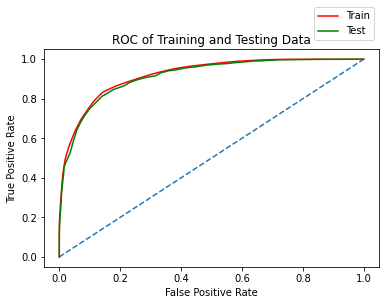

In [270]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(dt_train_fpr, dt_train_tpr, color='red', label="Train")
plt.plot(dt_test_fpr, dt_test_tpr, color='green', label="Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Training and Testing Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Final Model: Comparison of the Models

In [271]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_accuracy,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_accuracy,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
        'LDA Train':[lda_train_accuracy,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_accuracy,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'KNN Train':[knn_train_accuracy,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test':[knn_test_accuracy,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'NB Train':[nb_train_accuracy,nb_train_auc,nb_train_recall,nb_train_precision,nb_train_f1],
        'NB Test':[nb_test_accuracy,nb_test_auc,nb_test_recall,nb_test_precision,nb_test_f1],
        'Random Forest Train':[rf_train_accuracy,rf_train_auc, rf_train_recall, rf_train_precision, rf_train_f1],
        'Random Forest Test':[rf_test_accuracy,rf_test_auc, rf_test_recall, rf_test_precision, rf_test_f1],
        'CART Train':[dt_train_accuracy, dt_train_auc, dt_train_recall, dt_train_precision, dt_train_f1],
        'CART Test':[dt_test_accuracy,dt_test_auc, dt_test_recall, dt_test_precision, dt_test_f1]},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test,KNN Train,KNN Test,NB Train,NB Test,Random Forest Train,Random Forest Test,CART Train,CART Test
Accuracy,0.81,0.81,0.80,0.80,1.00,0.98,0.75,0.76,0.87,0.87,0.84,0.84
AUC,0.88,0.88,0.88,0.88,1.00,0.98,0.85,0.85,0.96,0.96,0.92,0.91
Recall,0.83,0.82,0.85,0.83,0.99,0.99,0.84,0.84,0.87,0.85,0.83,0.81
Precision,0.79,0.80,0.77,0.78,0.97,0.97,0.72,0.72,0.89,0.89,0.86,0.85
F1 Score,0.81,0.81,0.81,0.81,0.98,0.98,0.77,0.77,0.88,0.87,0.84,0.83


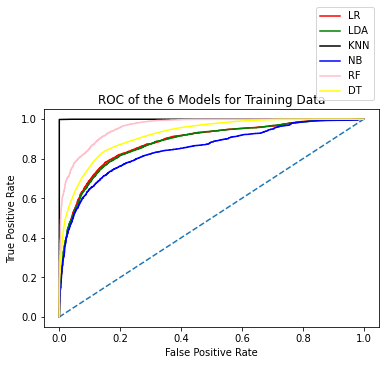

In [272]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr, color='red', label="LR")
plt.plot(lda_train_fpr, lda_train_tpr, color='green', label="LDA")
plt.plot(knn_train_fpr, knn_train_tpr, color='black', label="KNN")
plt.plot(nb_train_fpr, nb_train_tpr, color='blue', label="NB")
plt.plot(rf_train_fpr, rf_train_tpr, color='pink', label="RF")
plt.plot(dt_train_fpr, dt_train_tpr, color='yellow', label="DT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of the 6 Models for Training Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

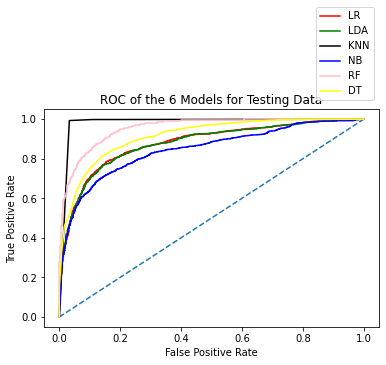

In [273]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr, color='red', label="LR")
plt.plot(lda_test_fpr, lda_test_tpr, color='green', label="LDA")
plt.plot(knn_test_fpr, knn_test_tpr, color='black', label="KNN")
plt.plot(nb_test_fpr, nb_test_tpr, color='blue', label="NB")
plt.plot(rf_test_fpr, rf_test_tpr, color='pink', label="RF")
plt.plot(dt_test_fpr, dt_test_tpr, color='yellow', label="DT")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of the 6 Models for Testing Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Model Tuning

### Bagging Model

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.

#### Model Building

In [274]:
from sklearn.ensemble import BaggingClassifier


bgcl_model = BaggingClassifier(base_estimator=rfcl, bootstrap = True, 
      max_features = 0.5)
bgcl_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  max_features=0.5)

#### Predicting on Train and Test dataset

In [275]:
ytrain_predict = bgcl_model.predict(X_train)
ytest_predict = bgcl_model.predict(X_test)

#### Model Evaluation

##### Accuracy for the Training Data

In [276]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

bgcl_train_accuracy = bgcl_model.score(X_train,y_train)
bgcl_train_accuracy

0.9993461915658712

##### AUC and ROC for the Training Data

AUC: 1.000


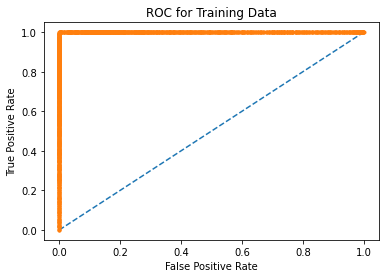

In [277]:
probs = bgcl_model.predict_proba(X_train)

probs = probs[:, 1]

# calculate AUC
bgcl_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bgcl_train_auc)

# calculate roc curve
bgcl_train_fpr, bgcl_train_tpr, bgcl_train_thresholds = roc_curve(y_train, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(bgcl_train_fpr, bgcl_train_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training Data')
plt.show()

##### Confusion Matrix for the Training Data

In [278]:
confusion_matrix(y_train, ytrain_predict)

array([[4588,    0],
       [   6, 4583]], dtype=int64)

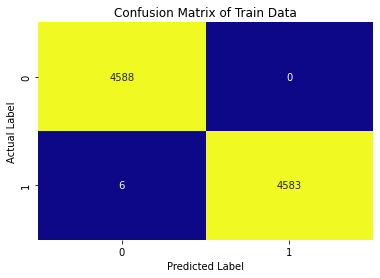

In [279]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='plasma')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data')
plt.show()

##### Classification Report for the Training Data

In [280]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4588
         1.0       1.00      1.00      1.00      4589

    accuracy                           1.00      9177
   macro avg       1.00      1.00      1.00      9177
weighted avg       1.00      1.00      1.00      9177



In [281]:
bg_metrics = classification_report(y_train, ytrain_predict, output_dict=True)
df = pd.DataFrame(bg_metrics).transpose()
bg_train_recall = round(df.loc["1.0"][1], 2)
bg_train_precision = round(df.loc["1.0"][0], 2)
bg_train_f1 = round(df.loc["1.0"][2], 2)
print ('bg_train_recall ', bg_train_recall)
print ('bg_train_precision ', bg_train_precision)
print ('bg_train_f1 ', bg_train_f1)

bg_train_recall  1.0
bg_train_precision  1.0
bg_train_f1  1.0


##### Accuracy for the Testing Data

In [282]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

bgcl_test_accuracy = bgcl_model.score(X_test, y_test)
bgcl_test_accuracy

0.9730485634375795

##### AUC and ROC for the Testing Data

AUC: 0.997


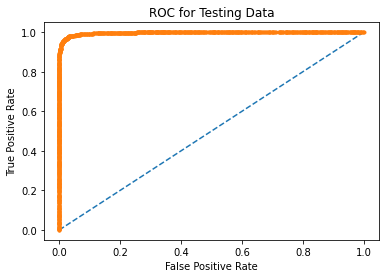

In [283]:
probs = bgcl_model.predict_proba(X_test)

probs = probs[:, 1]

# calculate AUC
bgcl_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bgcl_test_auc)

# calculate roc curve
bgcl_test_fpr, bgcl_test_tpr, bgcl_test_thresholds = roc_curve(y_test, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(bgcl_test_fpr, bgcl_test_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing Data')
plt.show()

##### Confusion Matrix for the Testing Data

In [284]:
confusion_matrix(y_test, ytest_predict)

array([[1933,   34],
       [  72, 1894]], dtype=int64)

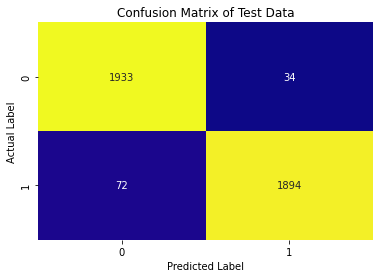

In [285]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='plasma')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data')
plt.show()

##### Classification Report for the Testing Data

In [286]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1967
         1.0       0.98      0.96      0.97      1966

    accuracy                           0.97      3933
   macro avg       0.97      0.97      0.97      3933
weighted avg       0.97      0.97      0.97      3933



In [287]:
bg_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(bg_metrics).transpose()
bg_test_recall = round(df.loc["1.0"][1], 2)
bg_test_precision = round(df.loc["1.0"][0], 2)
bg_test_f1 = round(df.loc["1.0"][2], 2)
print ('bg_test_recall ', bg_test_recall)
print ('bg_test_precision ', bg_test_precision)
print ('bg_test_f1 ', bg_test_f1)

bg_test_recall  0.96
bg_test_precision  0.98
bg_test_f1  0.97


##### Combining the Train and Test Data

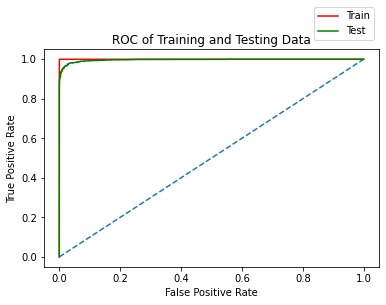

In [288]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(bgcl_train_fpr, bgcl_train_tpr, color='red', label="Train")
plt.plot(bgcl_test_fpr, bgcl_test_tpr, color='green', label="Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Training and Testing Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Boosting Model

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction.

#### Model Building

In [289]:
from sklearn.ensemble import AdaBoostClassifier

ab_model=AdaBoostClassifier(n_estimators=100,random_state=42)
ab_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

#### Predicting on Train and Test dataset

In [290]:
ytrain_predict = ab_model.predict(X_train)
ytest_predict = ab_model.predict(X_test)

#### Model Evaluation

##### Accuracy for the Training Data

In [291]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ab_train_accuracy = ab_model.score(X_train, y_train)
ab_train_accuracy

0.8982238204206168

##### AUC and ROC for the Training Data

AUC: 0.966


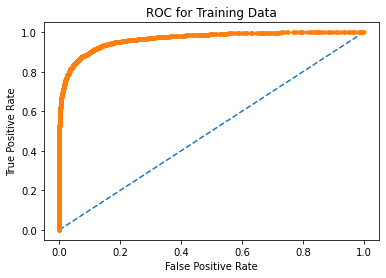

In [292]:
probs = ab_model.predict_proba(X_train)

probs = probs[:, 1]

# calculate AUC
ab_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ab_train_auc)

# calculate roc curve
ab_train_fpr, ab_train_tpr, ab_train_thresholds = roc_curve(y_train, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(ab_train_fpr, ab_train_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training Data')
plt.show()

##### Confusion Matrix for the Training Data

In [293]:
confusion_matrix(y_train, ytrain_predict)

array([[4152,  436],
       [ 498, 4091]], dtype=int64)

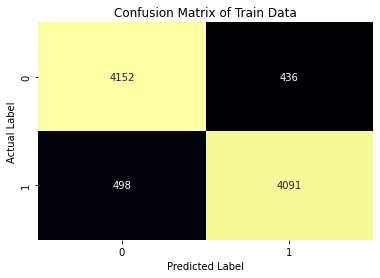

In [294]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='inferno')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data')
plt.show()

##### Classification Report for the Training Data

In [295]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      4588
         1.0       0.90      0.89      0.90      4589

    accuracy                           0.90      9177
   macro avg       0.90      0.90      0.90      9177
weighted avg       0.90      0.90      0.90      9177



In [296]:
ab_metrics = classification_report(y_train, ytrain_predict, output_dict=True)
df = pd.DataFrame(ab_metrics).transpose()
ab_train_recall = round(df.loc["1.0"][1], 2)
ab_train_precision = round(df.loc["1.0"][0], 2)
ab_train_f1 = round(df.loc["1.0"][2], 2)
print ('ab_train_recall ', ab_train_recall)
print ('ab_train_precision ', ab_train_precision)
print ('ab_train_f1 ', ab_train_f1)

ab_train_recall  0.89
ab_train_precision  0.9
ab_train_f1  0.9


##### Accuracy for the Testing Data

In [297]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ab_test_accuracy = ab_model.score(X_test, y_test)
ab_test_accuracy

0.8957538774472413

##### AUC and ROC for the Testing Data

AUC: 0.997


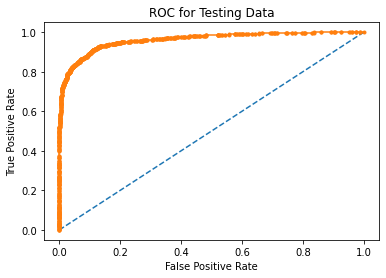

In [298]:
probs = ab_model.predict_proba(X_test)

probs = probs[:, 1]

# calculate AUC
ab_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bgcl_test_auc)

# calculate roc curve
ab_test_fpr, ab_test_tpr, ab_test_thresholds = roc_curve(y_test, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(ab_test_fpr, ab_test_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing Data')
plt.show()

##### Confusion Matrix for the Testing Data

In [299]:
confusion_matrix(y_test, ytest_predict)

array([[1781,  186],
       [ 224, 1742]], dtype=int64)

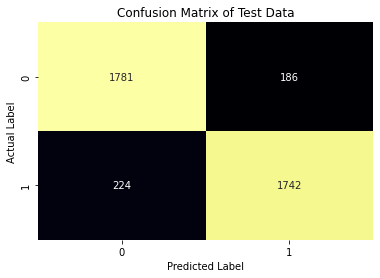

In [300]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='inferno')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data')
plt.show()

##### Classification Report for the Testing Data

In [301]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      1967
         1.0       0.90      0.89      0.89      1966

    accuracy                           0.90      3933
   macro avg       0.90      0.90      0.90      3933
weighted avg       0.90      0.90      0.90      3933



In [302]:
ab_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(ab_metrics).transpose()
ab_test_recall = round(df.loc["1.0"][1], 2)
ab_test_precision = round(df.loc["1.0"][0], 2)
ab_test_f1 = round(df.loc["1.0"][2], 2)
print ('ab_test_recall ', ab_test_recall)
print ('ab_test_precision ', ab_test_precision)
print ('ab_test_f1 ', ab_test_f1)

ab_test_recall  0.89
ab_test_precision  0.9
ab_test_f1  0.89


##### Combining the Train and Test Data

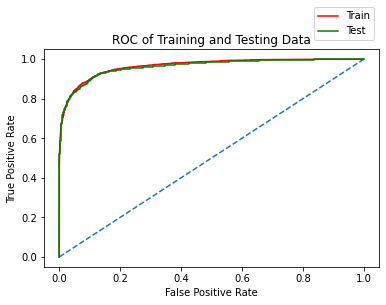

In [303]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(ab_train_fpr, ab_train_tpr, color='red', label="Train")
plt.plot(ab_test_fpr, ab_test_tpr, color='green', label="Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Training and Testing Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### Gradient Boosting 

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

#### Model Building

In [304]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model=GradientBoostingClassifier(n_estimators=100,random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

#### Predicting on Train and Test dataset

In [305]:
ytrain_predict = gb_model.predict(X_train)
ytest_predict = gb_model.predict(X_test)

##### Accuracy for the Training Data

In [306]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

gb_train_accuracy = gb_model.score(X_train, y_train)
gb_train_accuracy

0.9200174348915767

##### AUC and ROC for the Training Data

AUC: 0.966


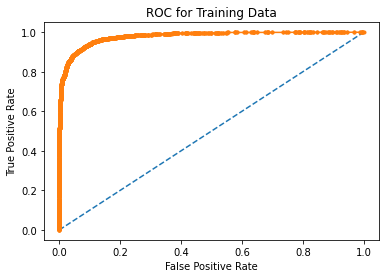

In [307]:
probs = gb_model.predict_proba(X_train)

probs = probs[:, 1]

# calculate AUC
gb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % ab_train_auc)

# calculate roc curve
gb_train_fpr, gb_train_tpr, gb_train_thresholds = roc_curve(y_train, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gb_train_fpr, gb_train_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Training Data')
plt.show()

##### Confusion Matrix for the Training Data

In [308]:
confusion_matrix(y_train, ytrain_predict)

array([[4251,  337],
       [ 397, 4192]], dtype=int64)

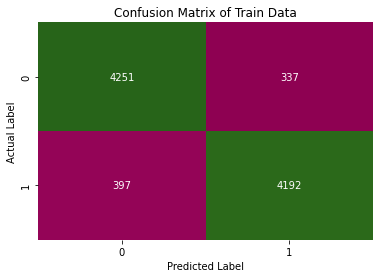

In [309]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='PiYG')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Train Data')
plt.show()

##### Classification Report for the Training Data

In [310]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      4588
         1.0       0.93      0.91      0.92      4589

    accuracy                           0.92      9177
   macro avg       0.92      0.92      0.92      9177
weighted avg       0.92      0.92      0.92      9177



In [311]:
gb_metrics = classification_report(y_train, ytrain_predict, output_dict=True)
df = pd.DataFrame(gb_metrics).transpose()
gb_train_recall = round(df.loc["1.0"][1], 2)
gb_train_precision = round(df.loc["1.0"][0], 2)
gb_train_f1 = round(df.loc["1.0"][2], 2)
print ('gb_train_recall ', gb_train_recall)
print ('gb_train_precision ', gb_train_precision)
print ('gb_train_f1 ', gb_train_f1)

gb_train_recall  0.91
gb_train_precision  0.93
gb_train_f1  0.92


##### Accuracy for the Testing Data

In [312]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

gb_test_accuracy = gb_model.score(X_test, y_test)
gb_test_accuracy

0.9115179252479023

##### AUC and ROC for the Testing Data

AUC: 0.997


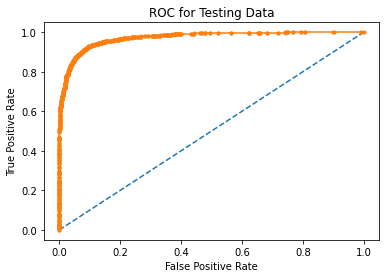

In [313]:
probs = gb_model.predict_proba(X_test)

probs = probs[:, 1]

# calculate AUC
gb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bgcl_test_auc)

# calculate roc curve
gb_test_fpr, gb_test_tpr, gb_test_thresholds = roc_curve(y_test, probs)

# plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gb_test_fpr, gb_test_tpr, marker='.');
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Testing Data')
plt.show()

##### Confusion Matrix for the Testing Data

In [314]:
confusion_matrix(y_test, ytest_predict)

array([[1826,  141],
       [ 207, 1759]], dtype=int64)

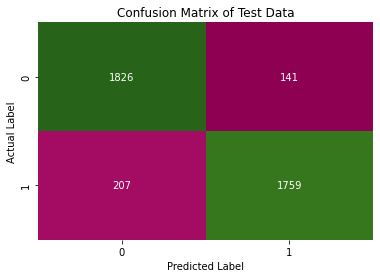

In [315]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True, fmt='d', cbar=False,cmap='PiYG')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix of Test Data')
plt.show()

##### Classification Report for the Testing Data

In [316]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1967
         1.0       0.93      0.89      0.91      1966

    accuracy                           0.91      3933
   macro avg       0.91      0.91      0.91      3933
weighted avg       0.91      0.91      0.91      3933



In [317]:
gb_metrics = classification_report(y_test, ytest_predict, output_dict=True)
df = pd.DataFrame(gb_metrics).transpose()
gb_test_recall = round(df.loc["1.0"][1], 2)
gb_test_precision = round(df.loc["1.0"][0], 2)
gb_test_f1 = round(df.loc["1.0"][2], 2)
print ('gb_test_recall ', gb_test_recall)
print ('gb_test_precision ', gb_test_precision)
print ('gb_test_f1 ', gb_test_f1)

gb_test_recall  0.89
gb_test_precision  0.93
gb_test_f1  0.91


##### Combining the Train and Test Data

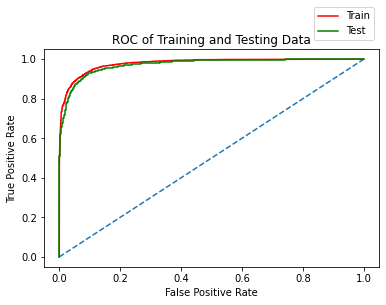

In [318]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(gb_train_fpr, gb_train_tpr, color='red', label="Train")
plt.plot(gb_test_fpr, gb_test_tpr, color='green', label="Test")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Training and Testing Data')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')